In [63]:
pip install Basemap

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

from mpl_toolkits.basemap import Basemap
from collections import OrderedDict
import datetime

print("All libraries are successfully installed and imported!")


All libraries are successfully installed and imported!


In [26]:
import warnings

# Ignorer les avertissements
warnings.filterwarnings('ignore')

# Pr√©diction des Retards au D√©part des Vols: Approches Machine Learning et Deep Learning 

## <font color='#922B21'>Our Aim </font>

Les retards de vol sont une r√©alit√© fr√©quente dans le secteur de l'aviation, affectant les compagnies a√©riennes, les a√©roports, et surtout les passagers. La capacit√© de pr√©dire ces retards avec pr√©cision repr√©sente un enjeu crucial pour l'am√©lioration de la satisfaction des clients, l'optimisation des op√©rations a√©riennes et la r√©duction des co√ªts op√©rationnels.

Dans ce projet nous allons d√©velopper des mod√®les de pr√©diction pour estimer les retards au d√©part des vols **DepDelay** en utilisant deux approches diff√©rentes : une approche bas√©e sur le Machine Learning en utilisant des features exog√®nes, et une approche bas√©e sur les s√©ries temporelles en utilisant uniquement la s√©rie chronologique de **DepDelay.**

## <font color='#922B21'>Plan </font>

* **Let's greet the data : Data Importation**
* **Data Cleaning: handling missing values and duplicates**
* **Exploratory Data Analysis**
* **feature ingenering**
* **Modeling**

## <font color='#922B21'> Part 1: Let's Greet the Data </font>

**Signification des variables**

| Cat√©gorie                  | Variable          | Description                                                                                                          |
|----------------------------|-------------------|----------------------------------------------------------------------------------------------------------------------|
| **Informations temporelles**    |                   |                                                                                                                      |
|                            | Year              | Ann√©e du vol.                                                                                                        |
|                            | Month             | Mois du vol (de 1 √† 12).                                                                                             |
|                            | DayofMonth        | Jour du mois (de 1 √† 31).                                                                                            |
|                            | DayOfWeek         | Jour de la semaine (de 1 √† 7, o√π 1 est lundi et 7 est dimanche).                                                      |
|                            | DepTime           | Heure locale de d√©part r√©elle (au format HHMM, par exemple 1230 pour 12:30 PM).                                              |
|                            | CRSDepTime        | Heure local de d√©part pr√©vue selon l'horaire (au format HHMM).                                                              |
|                            | ArrTime           | Heure local d'arriv√©e r√©elle (au format HHMM).                                                                             |
|                            | CRSArrTime        | Heure local d'arriv√©e pr√©vue selon l'horaire (au format HHMM).                                                              |
| **Informations sur le vol**     |                   |                                                                                                                      |
|                            | UniqueCarrier     | Code unique du transporteur a√©rien.                                                                             |
|                            | FlightNum         | Num√©ro du vol.                                                                                                       |
|                            | TailNum           | Num√©ro de la queue de l'avion (identifiant unique de l'avion).                                                      |
| **Dur√©e et retard**             |                   |                                                                                                                      |
|                            | ActualElapsedTime| Temps total r√©el du vol en minutes. Si le vol est annul√© ou d√©vi√©, cette valeur est manquante.                      |
|                            | CRSElapsedTime    | Temps total pr√©vu du vol en minutes selon l'horaire.                                                                 |
|                            | AirTime           | Temps pass√© dans les airs en minutes. Si le vol est annul√© ou d√©vi√©, cette valeur est manquante.                   |
|                            | ArrDelay          | Retard √† l'arriv√©e en minutes. Une valeur negative indique que le vol est arriv√© plus tot que pr√©vue . Si le vol est annul√©, cette valeur est manquante.                                    |
|                            | DepDelay          | Retard au d√©part en minutes.Une valeur n√©gative indique que le vol est parti plus t√¥t  que pr√©vu. Si le vol est annul√©, cette valeur est manquante.                                      |
| **Informations g√©ographiques**  |                   |                                                                                                                      |
|                            | Origin            | Code de l'a√©roport d'origine(codes IATA)                                                                                       |
|                            | Dest              | Code de l'a√©roport de destination.                                                                                   |
|                            | Distance          | Distance entre l'a√©roport d'origine et l'a√©roport de destination en miles.                                           |
| **Informations sur le roulage** |                   |                                                                                                                      |
|                            | TaxiIn            | Temps de roulage apr√®s l'atterrissage, en minutes.                                                                   |
|                            | TaxiOut           | Temps de roulage avant le d√©collage, en minutes.                                                                     |
| **Statut du vol**               |                   |                                                                                                                      |
|                            | Cancelled         | Indicateur d'annulation du vol (1 si le vol est annul√©, 0 sinon).                                                     |
|                            | CancellationCode  | Code indiquant la raison de l'annulation (A:Transporteur,B : M√©t√©o, C : Syst√®me national de l'espace a√©rien (NAS), D : S√©curit√©). |
|                            | Diverted          |  signifie qu'un vol a √©t√© d√©vi√© de sa trajectoire pr√©vue vers un autre a√©roport que celui initialement pr√©vu pour l'atterrissage(1 si le vol est d√©vi√©, 0 sinon).                                                     |
| **D√©tails des retards**         |                   |                                                                                                                      |
|                            | CarrierDelay      | Retard d√ª au transporteur, en minutes.                                                                               |
|                            | WeatherDelay      | Retard d√ª aux conditions m√©t√©orologiques,comme des Conditions m√©t√©orologiques dangereuses qui sont pr√©vues ou se manifestent au point de d√©part, en route ou au point d'arriv√©e (en minutes).                                                                |
|                            | NASDelay          | Retard d√ª au syst√®me national de l'espace a√©rien (NAS), en minutes.                                                   |
|                            | SecurityDelay     | Retard d√ª aux contr√¥les de s√©curit√©, en minutes.                                                                     |
|                            | LateAircraftDelay| Retard d√ª √† l'arriv√©e tardive de l'a√©ronef, en minutes.                                                              |


Le mappage des codes du variable **UniqueCarrier** est le suivant:

| Code  | ligne A√©rien               |
|-------|---------------------------------|
| UA    | United Air Lines Inc.           |
| AA    | American Airlines Inc.          |
| US    | US Airways Inc.                 |
| HP    |America West Airlines            |
| AS    | Alaska Airlines Inc.            |
| CO    | Continental Airlines            |
| WN    | Southwest Airlines Co.          |
| DL    | Delta Air Lines Inc.            |
| TW    | Trans World Airlines            |
| NW    | Northwest Airline               |


Nous allons cr√©er un dataframe intitul√© airoport qui contient le mappage entre le code de la compagnie a√®rienne et son son complet. Ceci peut √™tre utilis√© plus tard 

In [27]:
# Cr√©ation du dictionnaire avec les donn√©es des compagnies a√©riennes
import pandas as pd

# Cr√©ation du dictionnaire avec les donn√©es des compagnies a√©riennes
abreviation_lignes_aeriennes = {
    'Code': ['UA', 'AA', 'US', 'HP', 'AS', 'CO', 'WN', 'DL', 'TW', 'NW'],
    'ligne A√©rien': ['United Air Lines Inc.', 'American Airlines Inc.', 'US Airways Inc.', 'America West Airlines',
                     'Alaska Airlines Inc.', 'Continental Airlines', 'Southwest Airlines Co.', 'Delta Air Lines Inc.',
                     'Trans World Airlines', 'Northwest Airline']
}

# Cr√©ation du DataFrame √† partir du dictionnaire
lignes_aeriennes = pd.DataFrame(abreviation_lignes_aeriennes)

**Importation des donn√©es et information correspondantes**

In [28]:
data = pd.read_csv("data.csv", sep=';')
data

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0        2000      1          28          5   1647.0        1647   1906.0   
1        2000      1          29          6   1648.0        1647   1939.0   
2        2000      1          30          7      NaN        1647      NaN   
3        2000      1          31          1   1645.0        1647   1852.0   
4        2000      1           1          6    842.0         846   1057.0   
...       ...    ...         ...        ...      ...         ...      ...   
1048570  2000      3          15          3   1132.0        1127   1248.0   
1048571  2000      3          16          4   1132.0        1127   1252.0   
1048572  2000      3          17          5   1125.0        1127   1243.0   
1048573  2000      3          18          6   1126.0        1127   1241.0   
1048574  2000      3          19          7   1203.0        1127   1319.0   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0              1859            HP        154  ...     15       11          0   
1              1859            HP        154  ...      5       47          0   
2              1859            HP        154  ...      0        0          1   
3              1859            HP        154  ...      7       14          0   
4              1101            HP        609  ...      3        8          0   
...             ...           ...        ...  ...    ...      ...        ...   
1048570        1252            TW        583  ...      2       14          0   
1048571        1252            TW        583  ...      3       20          0   
1048572        1252            TW        583  ...      2       18          0   
1048573        1252            TW        583  ...      5       11          0   
1048574        1252            TW        583  ...      2       18          0   

         CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0                     NaN         0           NaN          NaN      NaN   
1                     NaN         0           NaN          NaN      NaN   
2                     NaN         0           NaN          NaN      NaN   
3                     NaN         0           NaN          NaN      NaN   
4                     NaN         0           NaN          NaN      NaN   
...                   ...       ...           ...          ...      ...   
1048570               NaN         0           NaN          NaN      NaN   
1048571               NaN         0           NaN          NaN      NaN   
1048572               NaN         0           NaN          NaN      NaN   
1048573               NaN         0           NaN          NaN      NaN   
1048574               NaN         0           NaN          NaN      NaN   

         SecurityDelay  LateAircraftDelay  
0                  NaN                NaN  
1                  NaN                NaN  
2                  NaN                NaN  
3                  NaN                NaN  
4                  NaN                NaN  
...                ...                ...  
1048570            NaN                NaN  
1048571            NaN                NaN  
1048572            NaN                NaN  
1048573            NaN                NaN  
1048574            NaN                NaN  

[1048575 rows x 29 columns]

**Informations √†-propos propos les donn√©es**

* D'apr√®s la visualisation des donn√©es precendente, on d√©duit que les donn√©es on √©taient collect√©es pour des a√®roports am√©ricains entre le 1 janvier 2000 et le 31 mars 2000

* On va afficher un resum√© informatif de notre Dataframe pour avoir une id√©e sur la taille du data , le type de chaque feature et v√©rifier les nombres de valeurs non nulls dans chaque colonne

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1048575 non-null  int64  
 1   Month              1048575 non-null  int64  
 2   DayofMonth         1048575 non-null  int64  
 3   DayOfWeek          1048575 non-null  int64  
 4   DepTime            1005988 non-null  float64
 5   CRSDepTime         1048575 non-null  int64  
 6   ArrTime            1003334 non-null  float64
 7   CRSArrTime         1048575 non-null  int64  
 8   UniqueCarrier      1048575 non-null  object 
 9   FlightNum          1048575 non-null  int64  
 10  TailNum            1048575 non-null  object 
 11  ActualElapsedTime  1003334 non-null  float64
 12  CRSElapsedTime     1048540 non-null  float64
 13  AirTime            1003334 non-null  float64
 14  ArrDelay           1003334 non-null  float64
 15  DepDelay           1005988 non-n

Notre dataframe est form√© par 1 048 575 lignes et 29 colonnes dont  les colonnes **CancellationCode,** et les cinq colonnes relatives aux details des retards **CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay** sont tous nulles.

On remarque aussi que on a 16 colonnes sur 23 colonnes restant qui sont enti√®rement remplies .Ces colonnes sont les suivants:
 -**Year, Month, DayofMonth, DayOfWeek** : Informations temporelles sur le vol.
 
 -**CRSDepTime, CRSArrTime** : Heures de d√©part et d'arriv√©e pr√©vues.
 
 -**UniqueCarrier, FlightNum, TailNum** : Identifiants du vol et de l'avion.
 
 -**Origin, Dest** : A√©roports d'origine et de destination.
 
 -**Distance** : Distance du vol en miles.
 
 -**TaxiIn, TaxiOut** : Temps de roulage √† l'arriv√©e et au d√©part.
 
 -**Cancelled** : Indicateur si le vol est annul√©.
 
-**Diverted** : Indicateur si le vol est d√©vi√©.

* Pour avoir une vue d'ensemble de la zone g√©ographique couverte dans cet ensemble de donn√©es, nous allons tracer la localisation des a√©roports en utilisant la biblioth√®que de tra√ßage bibliographique **basemap** et indiquer le nombre de vols enregistr√©s. 

Le dataframe airports qui contient des informations sur les coordonn√©es geographique des aeroports am√©ricans qui existe pendant va nous servir aussi .


In [30]:
airports = pd.read_csv("airports.csv")
airports.head()

IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447

## <font color='#922B21'>Part 2: Pre‚Äëprocessing data </font>

La phase de pr√©-traitement √©limine les donn√©es non pertinentes et conserve uniquement les donn√©es essentielles et pertinentes. Les donn√©es sont organis√©es et pr√©par√©es en supprimant les doublons et les valeurs manquantes, les valeurs nulles √©tant √©limin√©es, et les vols annul√©s sont √©galement supprim√©s.

Pour pr√©server les donn√©es originales, nous allons cr√©er une copie sur laquelle nous allons travailler.

In [31]:
data_clean=data.copy()

## <font color='  #d98880'>2.1. Removing Duplicates

Supprimer les doublons du jeu de donn√©es est crucial car ils peuvent fausser les analyses statistiques et les performances du mod√®le en augmentant certaines observations. √âliminer les doublons garantit l'int√©grit√© et la pr√©cision des donn√©es, conduisant √† des insights plus fiables et significatifs dans les projets d'analyse de donn√©es. Alors, supprimons-les !

La ligne ci-dessous supprime les lignes dupliqu√©es du DataFrame `data_clean` en se basant sur toutes les colonnes (`subset=None`). Elle garde la premi√®re occurrence de chaque ligne dupliqu√©e (`keep='first'`) et modifie le DataFrame directement (`inplace=True`), ce qui signifie que les changements sont appliqu√©s directement √† `data_clean` plut√¥t que de cr√©er un nouveau DataFrame

In [32]:
data_clean.drop_duplicates(subset=None, keep='first', inplace=True)

In [33]:
data_clean.shape

(1048575, 29)

Nice! on remarque que notre data avec sa grande taille ne contient pas de lignes dupliqu√©es

## <font color='  #d98880'>2.2. Handling missing values

### - dropping rows with Cancelled flights

Les vols annul√©s ne pr√©sentent pas de retard de d√©part, ce qui en fait une des principales raisons de les exclure des analyses de retards

In [34]:
data_clean = data_clean[data_clean['Cancelled'] != 1]
data_clean.shape

(1005988, 29)

In [35]:
print("le pourcentage de donn√©es qui reprentent des vols annul√©es est de   ",round((1048575 - 1005988) / 1048575 * 100, 2), '%')

le pourcentage de donn√©es qui reprentent des vols annul√©es est de    4.06 %


La colonne cancelled ne contient que des 0 maintenant , elle ne va pas appoter aucune information .donc on peut la supprimer

In [36]:
data_clean = data_clean.drop(columns=['Cancelled'])

### - Les colonnes:  CancellationCode, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay 


Dans la partie pr√©cendente on a trouv√© 6 colonnes enti√®rement vides donc nous allons les suppprimer

In [37]:
columns_to_drop = [
    'CancellationCode', 'CarrierDelay', 'WeatherDelay',
    'NASDelay', 'SecurityDelay', 'LateAircraftDelay'
]
data_clean = data_clean.drop(columns=columns_to_drop)

### - Reste des colonnes avec valeurs manquantes

Le code suivant nous donnent les colonnes qui contiennent les valeurs manquantes 

In [38]:
# Liste des colonnes avec des valeurs manquantes
# Liste des colonnes avec des valeurs manquantes
colonnes_avec_valeurs_manquantes = data_clean.columns[data_clean.isnull().any()]
colonnes_avec_valeurs_manquantes

Index(['ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay'],
      dtype='object')

**Calculons le pourcentages des valeurs manquantes dans chacun de ces colonnes**

ArrTime              0.263820
ActualElapsedTime    0.263820
CRSElapsedTime       0.000099
AirTime              0.263820
ArrDelay             0.263820
dtype: float64


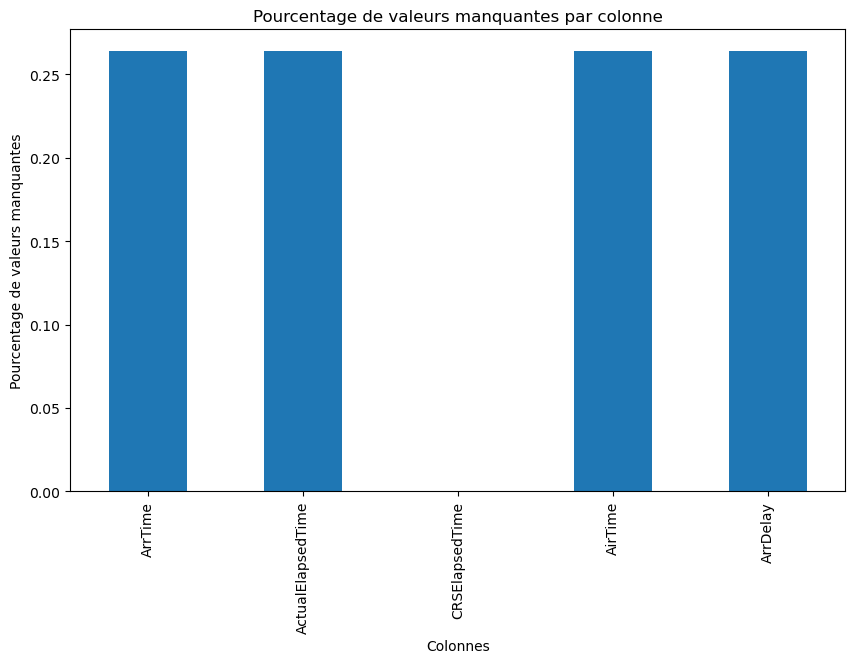

In [39]:
# Calcul du nombre de valeurs manquantes pour chaque colonne
nombre_valeurs_manquantes_par_colonne = data_clean[colonnes_avec_valeurs_manquantes].isnull().sum()

# Calcul du pourcentage de valeurs manquantes pour chaque colonne
pourcentage_valeurs_manquantes_par_colonne = (nombre_valeurs_manquantes_par_colonne / len(data_clean)) * 100

print(pourcentage_valeurs_manquantes_par_colonne)

# Configuration de la taille du graphique
plt.figure(figsize=(10, 6))

# Cr√©ation du graphique √† barres
pourcentage_valeurs_manquantes_par_colonne.plot(kind='bar')

# Ajout de titres et d'√©tiquettes
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage de valeurs manquantes')

# Affichage du graphique
plt.show()


* Le pourcentage des valeur manquentes pour CRSElapsedTime est tr√®s tr√®s faible (presque nul). La meilleur solution est de supprimer ces lignes

In [40]:
data_clean = data_clean.dropna(subset=['CRSElapsedTime'])
data_clean.shape

(1005987, 22)

* On voit aussi que le pourcentage totale des lignes avec des valeurs manquantes ne d√©passe pas le 1% ce qui met le dropping le meilleur choix pour les g√©rer! le pourcentage se suppression des donn√©es peut etre meme inferieur s'il existe certaines corr√©lations entre ces valeurs manquantes

Le code suivant nous permet de supprimer le reste des lignes qui contiennet des valeurs manquantes

In [41]:
data_clean = data_clean.dropna()
data_clean.shape

(1003334, 22)

In [42]:
print('Le taux des lignes supprim√©es est de', round((1005987 - 1003334) / 1005987 * 100, 2), '%')

Le taux des lignes supprim√©es est de 0.26 %


Puisque le taux de suppression de la reste de ces lignes est de 0.26% qui est une valeure qui montrent qu'il existe une correlation tr√®s forte vue parfaite entre les valeurs manquantes

In [43]:
print('Le taux totale des lignes supprim√©es est de', round((1048575 - 1003334) / 1048575 * 100, 2), '%')

Le taux totale des lignes supprim√©es est de 4.31 %


## <font color='  #d98880'>2.3. Processing the date

Dans la base de donn√©es la date est r√©partie sur 3 colonne qui n'est pas pratique .Donc on va regouper les 3 colonne `Year`,`Month` et `DayOfMonth` dans une seule colonne avec le format date en python

In [44]:
# Renommer la colonne 'DayofMonth' en 'Day'
data_clean.rename(columns={'DayofMonth': 'Day'}, inplace=True)
# Combiner les colonnes 'Year', 'Month' et 'Day' en un objet datetime
data_clean['Date'] = pd.to_datetime(data_clean[['Year', 'Month', 'Day']])
# Supprimer les colonnes 'Year', 'Month' et 'Day'
data_clean.drop(columns=['Year'], inplace=True)

## <font color='  #d98880'>2.4. Processing les heures

Les heures dans le data frame sont tous aux forme d'un nombre flottant ou int o√π les deux premiers chiffres indiquent l'heure et les deux derniers, les minutes. Ce format n'est pas pratique et nous allons les convertir donc.

Nous allons d'abord d√©finir la fonction suivante qui nous permet de convertir les 4 colonnes temps (`DepTime,ArrTime,CRSDepTime,CRSArrTime`) au format time HH:MM:SS

In [45]:
from datetime import time

# Fonction pour convertir l'heure en format time avec v√©rification des valeurs valides
def convert_to_time(df, col_name):
    col = df[col_name].dropna().astype(int).astype(str).str.zfill(4)
    hours = col.str[:2].astype(int)
    minutes = col.str[2:].astype(int)
    
    times = []
    for h, m in zip(hours, minutes):
        if 0 <= h < 24 and 0 <= m < 60:
            times.append(time(h, m))
        else:
            times.append(None)  # Utiliser None pour les valeurs invalides
    
    df[col_name + '_time'] = pd.Series(times, index=df[col_name].dropna().index)


In [46]:

# Appliquer uniquement aux colonnes horaires
time_columns = ['DepTime', 'ArrTime', 'CRSDepTime', 'CRSArrTime']
for col in time_columns:
    convert_to_time(data_clean, col)

# Supprimer les anciennes colonnes
columns_to_drop = time_columns
data_clean.drop(columns=columns_to_drop, inplace=True)

# Renommer les colonnes
new_column_names = {
    'DepTime_time': 'DepTime',
    'ArrTime_time': 'ArrTime',
    'CRSDepTime_time': 'CRSDepTime',
    'CRSArrTime_time': 'CRSArrTime'
}
data_clean.rename(columns=new_column_names, inplace=True)


## <font color='  #d98880'>2.5. La colonne Diverted

La colonne `Diverted`presente des valeurs cas tr√®s rare pour la quelle l'avion d√©vie de sa chemin ou se trouve oblig√© a se d√©barquer dans un autre a√®roport autre que celui de la destination avant de continuer son vol vers sa destination. Pour cela nous allons d√©couvrir s'il existe des cas de vol d√©vie  `Diverted=1` nous supprimons les lignes correspondant en cas d'existance puisqu'il represente des outliers puis supprimer cette colonne puisqu'elle n'est plus informative

In [47]:
diverted_values = data_clean['Diverted'].unique()
print("Valeurs uniques dans la colonne 'Diverted':", diverted_values)

Valeurs uniques dans la colonne 'Diverted': [0]


Puisqu'il n'existe pas des cas pourlequel les avions ont d√©vi√© nous allons supprimons directement cette colonne

In [48]:
data_clean.drop(columns=['Diverted'], inplace=True)

## <font color='  #d98880'>2.6. Les colonnes TaxiIN et ArrTime et CRSArrTime et ArrDelay 

les donn√©es reli√©s du temps d'arriv√©, temps de roulage apr√®s atterissement,temps d'arriv√© pr√©vue non aucune relation sur la pr√©diction du temps de d√©part. Il sont non informatif donc on va le √©liminer de notre dataframe

In [49]:
# Liste des colonnes √† supprimer
colonnes_a_supprimer = ['TaxiIn', 'ArrTime', 'CRSArrTime','ArrDelay']

# Supprimer les colonnes de la liste
data_clean = data_clean.drop(columns=colonnes_a_supprimer)

In [50]:
data_clean

Month  Day  DayOfWeek UniqueCarrier  FlightNum TailNum  \
0            1   28          5            HP        154  N808AW   
1            1   29          6            HP        154  N653AW   
3            1   31          1            HP        154  N806AW   
4            1    1          6            HP        609  N158AW   
5            1    2          7            HP        609  N656AW   
...        ...  ...        ...           ...        ...     ...   
1048570      3   15          3            TW        583   N979Z   
1048571      3   16          4            TW        583   N983Z   
1048572      3   17          5            TW        583   N996Z   
1048573      3   18          6            TW        583  N982PS   
1048574      3   19          7            TW        583  N982PS   

         ActualElapsedTime  CRSElapsedTime  AirTime  DepDelay Origin Dest  \
0                    259.0           252.0    233.0       0.0    ATL  PHX   
1                    291.0           252.0    239.0       1.0    ATL  PHX   
3                    247.0           252.0    226.0      -2.0    ATL  PHX   
4                    255.0           255.0    244.0      -4.0    ATL  PHX   
5                    299.0           255.0    267.0       3.0    ATL  PHX   
...                    ...             ...      ...       ...    ...  ...   
1048570               76.0            85.0     60.0       5.0    STL  LNK   
1048571               80.0            85.0     57.0       5.0    STL  LNK   
1048572               78.0            85.0     58.0      -2.0    STL  LNK   
1048573               75.0            85.0     59.0      -1.0    STL  LNK   
1048574               76.0            85.0     56.0      36.0    STL  LNK   

         Distance  TaxiOut       Date   DepTime CRSDepTime  
0            1587       11 2000-01-28  16:47:00   16:47:00  
1            1587       47 2000-01-29  16:48:00   16:47:00  
3            1587       14 2000-01-31  16:45:00   16:47:00  
4            1587        8 2000-01-01  08:42:00   08:46:00  
5            1587       24 2000-01-02  08:49:00   08:46:00  
...           ...      ...        ...       ...        ...  
1048570       370       14 2000-03-15  11:32:00   11:27:00  
1048571       370       20 2000-03-16  11:32:00   11:27:00  
1048572       370       18 2000-03-17  11:25:00   11:27:00  
1048573       370       11 2000-03-18  11:26:00   11:27:00  
1048574       370       18 2000-03-19  12:03:00   11:27:00  

[1003334 rows x 17 columns]

## <font color='  #d98880'>2.7. Les variables `AirTime, CRSElapsedTime `et `ActualElapsedTime` 

ces variables n'ont pas de relations naturels avec le retrard de d√©pard mais plus tot au retard d'arriv√© donc on va les supprimer

In [51]:
# Liste des variables √† supprimer
variables_a_supprimer = ['AirTime', 'CRSElapsedTime', 'ActualElapsedTime']

# Supprimer les variables du dataframe
data_clean.drop(variables_a_supprimer, axis=1, inplace=True)

In [52]:
data_clean

Month  Day  DayOfWeek UniqueCarrier  FlightNum TailNum  DepDelay  \
0            1   28          5            HP        154  N808AW       0.0   
1            1   29          6            HP        154  N653AW       1.0   
3            1   31          1            HP        154  N806AW      -2.0   
4            1    1          6            HP        609  N158AW      -4.0   
5            1    2          7            HP        609  N656AW       3.0   
...        ...  ...        ...           ...        ...     ...       ...   
1048570      3   15          3            TW        583   N979Z       5.0   
1048571      3   16          4            TW        583   N983Z       5.0   
1048572      3   17          5            TW        583   N996Z      -2.0   
1048573      3   18          6            TW        583  N982PS      -1.0   
1048574      3   19          7            TW        583  N982PS      36.0   

        Origin Dest  Distance  TaxiOut       Date   DepTime CRSDepTime  
0          ATL  PHX      1587       11 2000-01-28  16:47:00   16:47:00  
1          ATL  PHX      1587       47 2000-01-29  16:48:00   16:47:00  
3          ATL  PHX      1587       14 2000-01-31  16:45:00   16:47:00  
4          ATL  PHX      1587        8 2000-01-01  08:42:00   08:46:00  
5          ATL  PHX      1587       24 2000-01-02  08:49:00   08:46:00  
...        ...  ...       ...      ...        ...       ...        ...  
1048570    STL  LNK       370       14 2000-03-15  11:32:00   11:27:00  
1048571    STL  LNK       370       20 2000-03-16  11:32:00   11:27:00  
1048572    STL  LNK       370       18 2000-03-17  11:25:00   11:27:00  
1048573    STL  LNK       370       11 2000-03-18  11:26:00   11:27:00  
1048574    STL  LNK       370       18 2000-03-19  12:03:00   11:27:00  

[1003334 rows x 14 columns]

## <font color='  #d98880'>2.8. La variables `FlightNum` 

la variable FlightNum est un identifiant qui r√©sume certaine information sur le vol. Ces information sont trouv√©s dans les autres variables.   Ceci est plus facile pour les mod√®le de machine learning de les extraires. Donc on peut eliminer cette colonne

In [53]:
# Supprimer la colonne FlightNum
data_clean = data_clean.drop(columns=['FlightNum'])

## <font color='  #d98880'>2.9. La variables `Distance` 

la variable distance n'a aucune relation sur le retard de d√©pard donc on va la supprimer 

In [54]:
data_clean = data_clean.drop(columns=['Distance'])

## <font color='  #d98880'>2.9. La variables `DepTime` 

la temps de depart est d√©ductible √† partir du temps pr√©vue de d√©pard et du retard de d√©pard lui meme donc on va la supprimer

In [55]:
data_clean = data_clean.drop(columns=['DepTime'])

In [56]:
data_clean.head()

Month  Day  DayOfWeek UniqueCarrier TailNum  DepDelay Origin Dest  TaxiOut  \
0      1   28          5            HP  N808AW       0.0    ATL  PHX       11   
1      1   29          6            HP  N653AW       1.0    ATL  PHX       47   
3      1   31          1            HP  N806AW      -2.0    ATL  PHX       14   
4      1    1          6            HP  N158AW      -4.0    ATL  PHX        8   
5      1    2          7            HP  N656AW       3.0    ATL  PHX       24   

        Date CRSDepTime  
0 2000-01-28   16:47:00  
1 2000-01-29   16:47:00  
3 2000-01-31   16:47:00  
4 2000-01-01   08:46:00  
5 2000-01-02   08:46:00

In [57]:
from IPython.display import FileLink
# Enregistrer le dataframe au format CSV
data_clean.to_csv("data_clean.csv", index=False)

# Afficher le lien de t√©l√©chargement
FileLink("data_clean.csv")


C:\Users\Lenovo\data_clean.csv

## <font color='#922B21'>Part 3:Exploratory Data Analysis </font>

## <font color='  #d98880'>3.1. Distribution du retard de d√©part`DepDelay` 

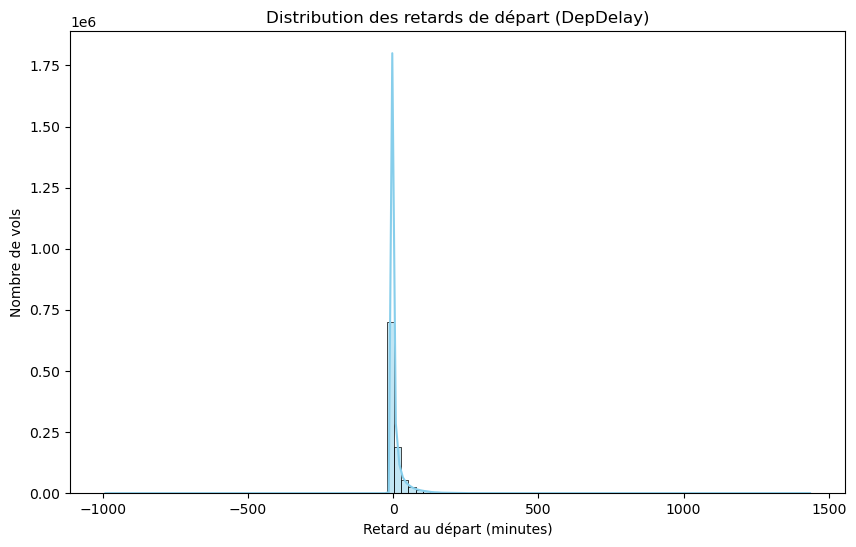

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['DepDelay'], bins=100, kde=True, color='skyblue')
plt.title('Distribution des retards de d√©part (DepDelay)')
plt.xlabel('Retard au d√©part (minutes)')
plt.ylabel('Nombre de vols')
plt.show()

la distribution des retards de d√©part peut etre mod√©lis√© avec une loi exponentielle $f(x)=aexp(‚àíx/b)$ avec $a$ et $b$ sont les param√®tres du mod√®le

## <font color='  #d98880'>3.2. Visualisation des caract√©ristiques statiqtiques des retards de depard `DepDelay` en fonction des jours de la semaine `DayOfWeek `

Le code suivant g√©n√©rera un box plot qui montre la m√©diane, les quartiles, les valeurs aberrantes et la distribution des retards de d√©part pour chaque jour de la semaine

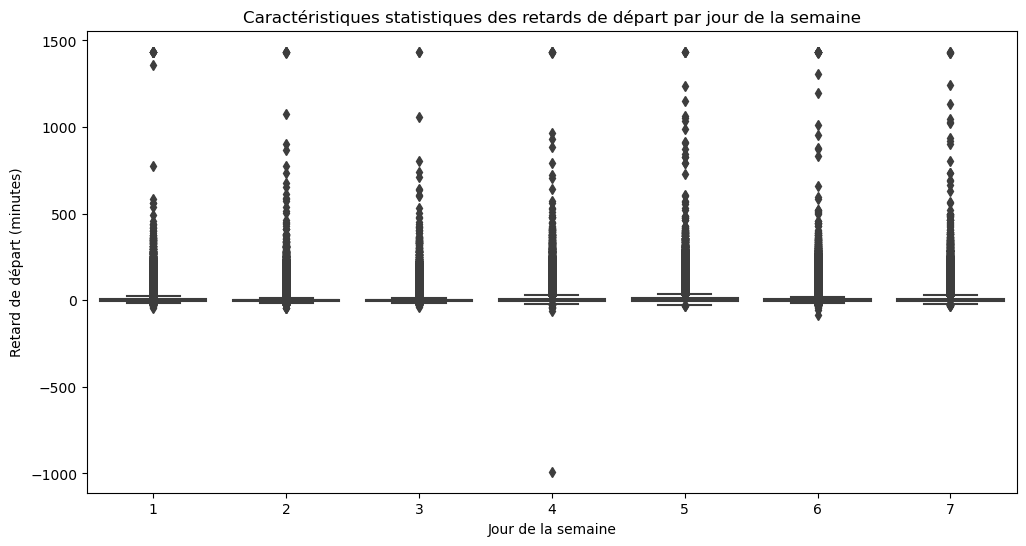

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='DepDelay', data=data_clean)
plt.title('Caract√©ristiques statistiques des retards de d√©part par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Retard de d√©part (minutes)')
plt.show()


On remarque que la dissribution du retard de d√©part diff√©re selon les jours de la semaine

## <font color='  #d98880'>3.3. les lignes a√®riennes `UniqueCarrier` et leur ponctualit√©

**Distribution des vols pour chaque  ligne a√®rien `UniqueCarrier`**

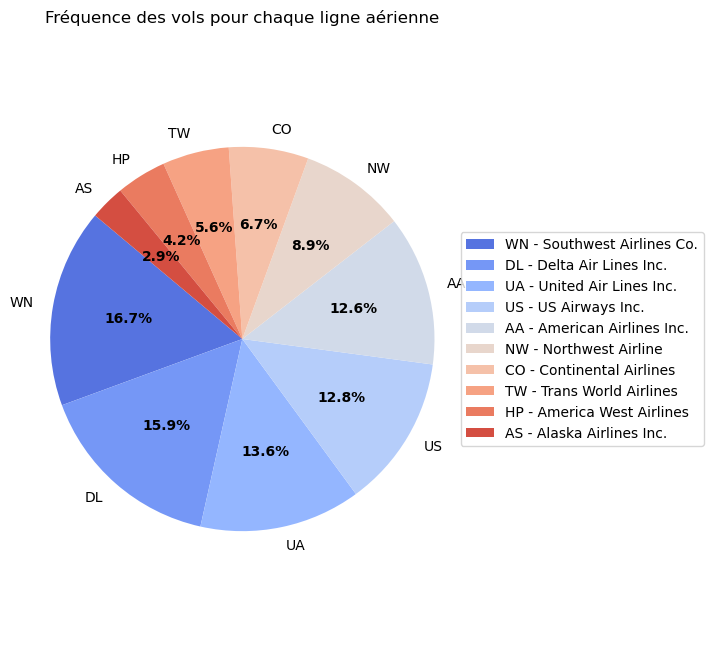

In [60]:

# Calculer la fr√©quence des vols pour chaque ligne a√©rienne
donnees_frequence_vols = data_clean['UniqueCarrier'].value_counts().reset_index()
donnees_frequence_vols.columns = ['UniqueCarrier', 'Frequence']

# Fusionner avec le DataFrame lignes_aeriennes pour obtenir les noms complets des lignes a√©riennes
donnees_frequence_vols = pd.merge(donnees_frequence_vols, lignes_aeriennes, left_on='UniqueCarrier', right_on='Code')

# Calculer la fr√©quence totale des vols
frequence_totale = donnees_frequence_vols['Frequence'].sum()

# Calculer les proportions de chaque ligne a√©rienne
donnees_frequence_vols['Proportion'] = donnees_frequence_vols['Frequence'] / frequence_totale

# Cr√©er le pie chart
plt.figure(figsize=(12, 8))
ax = plt.subplot(1, 2, 1)

# Utiliser la palette "coolwarm" de Seaborn pour les couleurs
colors = sns.color_palette("coolwarm", n_colors=len(donnees_frequence_vols))

# Pie chart
wedges, texts, autotexts = ax.pie(donnees_frequence_vols['Proportion'], labels=donnees_frequence_vols['UniqueCarrier'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.setp(autotexts, size=10, weight="bold")

# L√©gende
legend_rects = []
for code, airline, color in zip(donnees_frequence_vols['UniqueCarrier'], donnees_frequence_vols['ligne A√©rien'], colors):
    legend_rects.append(plt.Rectangle((0, 0), 1, 1, fc=color, edgecolor='none'))
ax.legend(legend_rects, donnees_frequence_vols['UniqueCarrier'] + ' - ' + donnees_frequence_vols['ligne A√©rien'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Fr√©quence des vols pour chaque ligne a√©rienne')

plt.axis('equal')

plt.show()

A partir de ce piechart on peut faire des observations sur la dynamiques du march√© a√®rien americain pour l'ann√©e 2000 entre janvier et mars.On peut conclure que les cinq premi√®res compagnies a√©riennes (WN, DL, UA, US, AA) repr√©sentent ensemble plus de 70% des vols, ce qui indique une concentration significative du march√© autour de quelques grandes compagnies.

**Description statistique des retards au d√©pard des vols `DepDelay` group√©s par ligne ae√®rien `UniqueCarrier`**

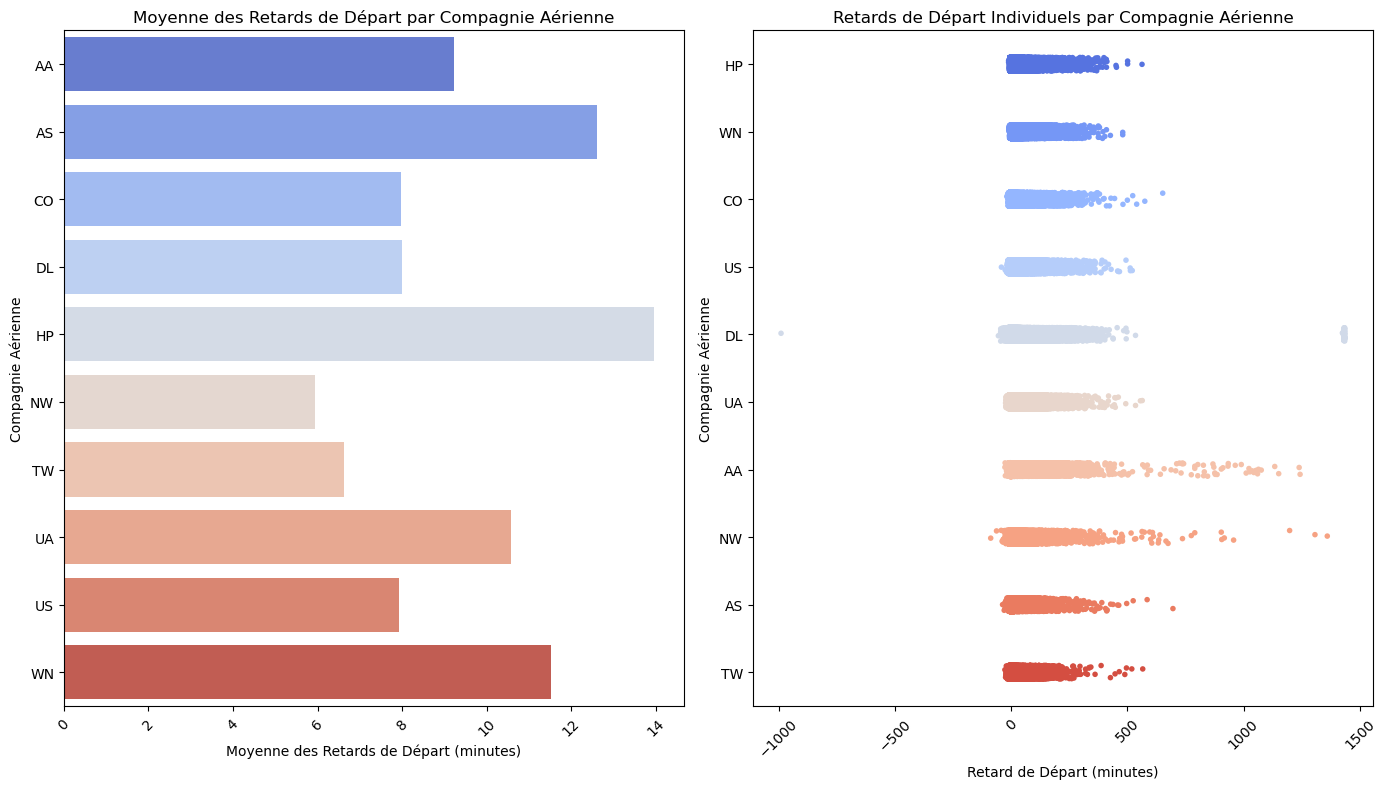

In [61]:
# Calculer la moyenne des retards pour chaque compagnie a√©rienne
moyenne_retards = data_clean.groupby('UniqueCarrier')['DepDelay'].mean().reset_index()
moyenne_retards.columns = ['UniqueCarrier', 'MoyenneRetard']

# Fusionner avec le DataFrame lignes_aeriennes pour obtenir les noms complets des lignes a√©riennes
moyenne_retards = pd.merge(moyenne_retards, lignes_aeriennes, left_on='UniqueCarrier', right_on='Code')

# Cr√©er une figure pour les graphiques
plt.figure(figsize=(14, 8))

# Cr√©er un barplot pour la moyenne des retards
plt.subplot(1, 2, 1)
sns.barplot(x='MoyenneRetard', y='UniqueCarrier', data=moyenne_retards, palette='coolwarm')
plt.title('Moyenne des Retards de D√©part par Compagnie A√©rienne')
plt.xlabel('Moyenne des Retards de D√©part (minutes)')
plt.ylabel('Compagnie A√©rienne')
plt.xticks(rotation=45)

# Cr√©er un stripplot pour les valeurs individuelles des retards
plt.subplot(1, 2, 2)
sns.stripplot(x='DepDelay', y='UniqueCarrier', data=data_clean, palette='coolwarm', size=4, jitter=True)
plt.title('Retards de D√©part Individuels par Compagnie A√©rienne')
plt.xlabel('Retard de D√©part (minutes)')
plt.ylabel('Compagnie A√©rienne')
plt.xticks(rotation=45)

# Afficher les graphiques
plt.tight_layout()
plt.show()


* Malgr√© leur faible frequences de vol, HP et AS  ont les moyennes de retards les plus √©lev√©es. Cela pourrait indiquer des d√©fis op√©rationnels sp√©cifiques √† ces compagnies, comme des hubs dans des a√©roports congestionn√©s

* Bien que Trans World Airlines (TW) ait une moyenne de retard relativement faible, le nombre √©lev√© d'outliers sugg√®re une variabilit√© importante dans leurs op√©rations. Cela pourrait indiquer que, bien que la plupart des vols soient √† l'heure, il y a une proportion significative de vols qui connaissent des retards importants.

* En g√©n√©ral,malgr√© le nombre √©lev√© de vol des cinq premi√®res compagnies a√©riennes (WN, DL, UA, US, AA),Il ont une moyenne de retard  relativement mod√©r√©e, sugg√©rant une bonne gestion des retards malgr√© un grand volume d'op√©rations.

Moyenne g√©n√©rale des retards: 9.21
Moyenne des retards pour le groupe 1: 9.51
Moyenne des retards pour le groupe 2: 8.44
Disparit√© entre les moyennes: 1.07


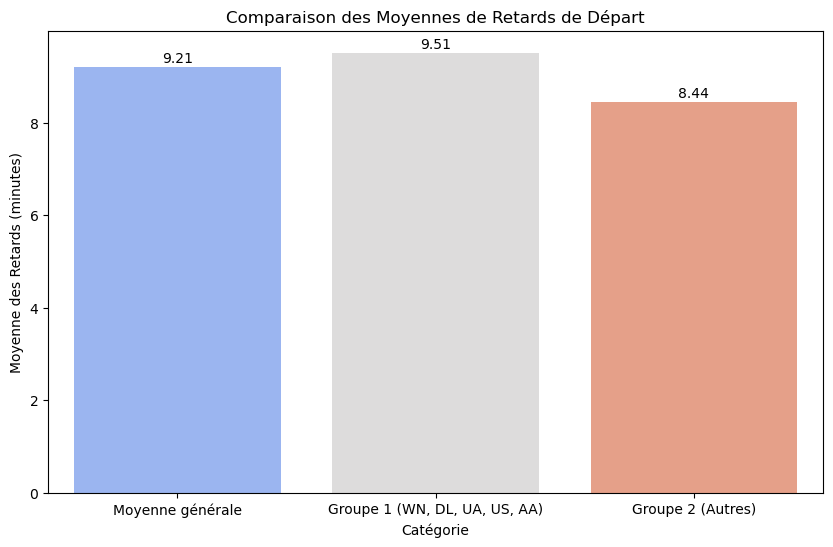

In [62]:
# Moyenne g√©n√©rale des retards
moyenne_generale = data_clean['DepDelay'].mean()

# D√©finition des groupes
groupe1 = ['WN', 'DL', 'UA', 'US', 'AA']
groupe2 = list(set(data_clean['UniqueCarrier']) - set(groupe1))

# Moyenne des retards pour chaque groupe
moyenne_groupe1 = data_clean[data_clean['UniqueCarrier'].isin(groupe1)]['DepDelay'].mean()
moyenne_groupe2 = data_clean[data_clean['UniqueCarrier'].isin(groupe2)]['DepDelay'].mean()

# Calcul de la disparit√©
disparite = moyenne_groupe1 - moyenne_groupe2

# Affichage des r√©sultats
print(f'Moyenne g√©n√©rale des retards: {moyenne_generale:.2f}')
print(f'Moyenne des retards pour le groupe 1: {moyenne_groupe1:.2f}')
print(f'Moyenne des retards pour le groupe 2: {moyenne_groupe2:.2f}')
print(f'Disparit√© entre les moyennes: {disparite:.2f}')

# Pr√©paration des donn√©es pour la visualisation
data = {
    'Cat√©gorie': ['Moyenne g√©n√©rale', 'Groupe 1 (WN, DL, UA, US, AA)', 'Groupe 2 (Autres)'],
    'Moyenne des retards': [moyenne_generale, moyenne_groupe1, moyenne_groupe2]
}

df_moyennes = pd.DataFrame(data)

# Cr√©ation du diagramme en barres
plt.figure(figsize=(10, 6))
sns.barplot(x='Cat√©gorie', y='Moyenne des retards', data=df_moyennes, palette='coolwarm')

# Ajout des valeurs au-dessus des barres
for index, row in df_moyennes.iterrows():
    plt.text(index, row['Moyenne des retards'] + 0.1, round(row['Moyenne des retards'], 2), color='black', ha="center")

plt.title('Comparaison des Moyennes de Retards de D√©part')
plt.ylabel('Moyenne des Retards (minutes)')
plt.xlabel('Cat√©gorie')

plt.show()

On peut conclure que les retards moyens se comportent de mani√®re homog√®ne parmi les compagnies a√©riennes (√† l'exception de deux cas extr√™mes). Ensuite, nous avons constat√© que cette faible valeur est une cons√©quence de la grande proportion de vols qui d√©collent √† l'heure. Cependant, de temps en temps, d'importants retards peuvent √™tre enregistr√©s.

**Mod√©lisation de la  distribution des retards de d√©part pour chaque companie a√®rienne**

La mod√©lisation de la distribution des retards pour chaque companie a√®rienne se fait en d√©terminant les param√®tres $a$ et $b$ du loi exponentiel.

le code suivant donne la distribution de retard pour chaque compagnie a√®rienne.

Notez que la normalisation de la distribution implique que $‚à´f(x)dx=1$. Ici, nous n'avons pas une √©galit√© stricte car la normalisation s'applique aux histogrammes mais pas √† la fonction de mod√®le.

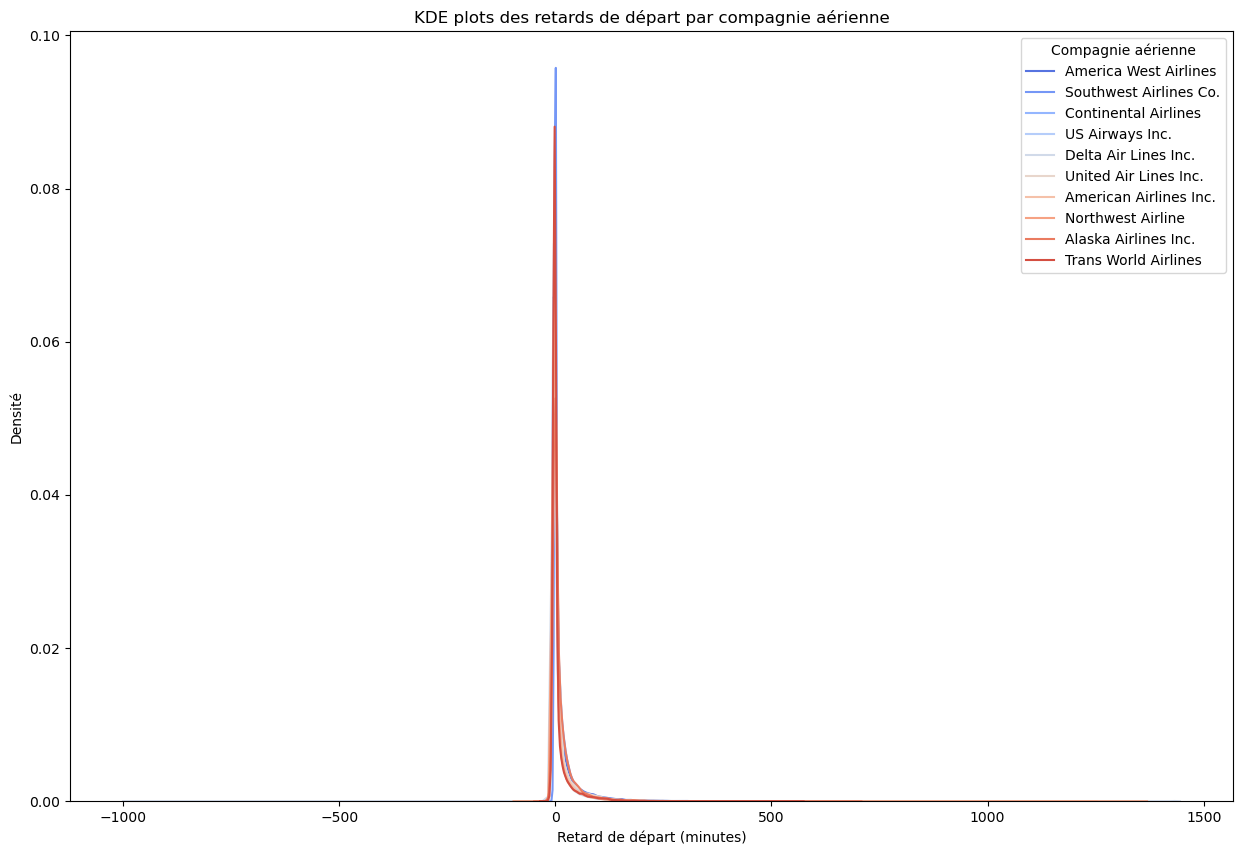

In [63]:
# Fusionner les donn√©es pour obtenir les noms complets des compagnies a√©riennes
data_clean = pd.merge(data_clean, lignes_aeriennes, left_on='UniqueCarrier', right_on='Code')

# Cr√©er un KDE plot pour chaque compagnie a√©rienne
plt.figure(figsize=(15, 10))
sns.set_palette("coolwarm", n_colors=len(data_clean['ligne A√©rien'].unique()))
for airline in data_clean['ligne A√©rien'].unique():
    sns.kdeplot(data=data_clean[data_clean['ligne A√©rien'] == airline]['DepDelay'], label=airline)
plt.title('KDE plots des retards de d√©part par compagnie a√©rienne')
plt.xlabel('Retard de d√©part (minutes)')
plt.ylabel('Densit√©')
plt.legend(title='Compagnie a√©rienne')
plt.show()

La relation $f(x)=aexp(‚àíx/b)$ implique que les coefficients $a$ et $b$ seront corr√©l√©s avec $a‚àù1/b$ et donc, seule l'une de ces deux valeurs est n√©cessaire pour d√©crire les distributions. Enfin, en fonction de la valeur de soit $a$ soit $b$, il est possible d'√©tablir un classement des compagnies.

En effet, le param√®tre $a$ represente l'√©chelle ou l'amplitude initile de la distribution c√†d la hauteur.Alors que b indique la rapidit√© avec laquelle la fonction d√©cro√Æt. Plus $b$ est grand, plus la fonction diminue lentement.

Par cons√©quent, les compagnies a√©riennes avec une grande valeur de $ùëé$ ont tendance √† √™tre plus ponctuelles.et Une valeur plus grande de 
$b$ signifie que les retards sont plus fr√©quents et plus longs. Les compagnies a√©riennes avec des valeurs √©lev√©es de $b$ ont donc tendance √† avoir des retards plus importants.

Donc en estimant l'un de ces param√®tres on peut classer les companies selon leur ponctualit√©.

## <font color='  #d98880'>3.3.Effet de  l'a√®roport sur  le retard de d√©part 

Dans cette section nous allons approuver la corr√©lation entre l'a√®roport de d√©part `Origin`,l'a√®roport de destination `Dest`, la compagnie a√®rienne`UniqueCarrier` , et le retard de d√©part `DepDelay`

**Nombre des a√®roports dans la data**

In [64]:
# Combiner les colonnes Origin et Dest pour obtenir tous les codes d'a√©roports
all_airports = pd.concat([data_clean['Origin'], data_clean['Dest']])

# Obtenir les codes d'a√©roports uniques
unique_airports = all_airports.unique()

# Compter le nombre d'a√©roports uniques
num_unique_airports = len(unique_airports)

print(f"Le nombre d'a√©roports uniques dans les donn√©es est : {num_unique_airports}")


Le nombre d'a√©roports uniques dans les donn√©es est : 201


**Impact du nombre de vol pour chaque a√®roport sur le retard de d√©part**

Le code suivant nous permet de grouper les a√®roport selon le nombre de vol effectu√© ainsi que  de visulaiser la zone geograpghique couvr√©√© par les a√®roports 

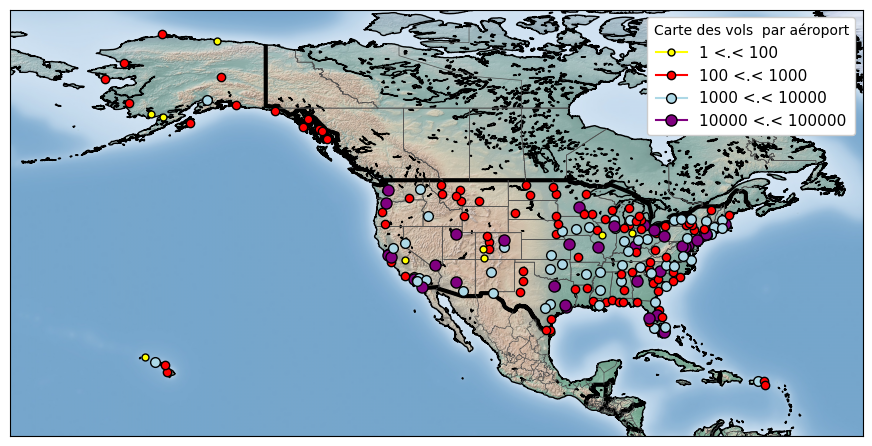

In [65]:
# Compter le nombre de vols au d√©part de chaque a√©roport
count_flights = data_clean['Origin'].value_counts()

# Cr√©er une nouvelle figure pour le trac√© de la carte avec une taille de 11x11 pouces
plt.figure(figsize=(11, 11))

# D√©finir les propri√©t√©s des marqueurs et des √©tiquettes
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']  # Couleurs des marqueurs
size_limits = [1, 100, 1000, 10000, 100000]  # Limites des tailles des marqueurs
labels = []  # √âtiquettes pour les diff√©rentes cat√©gories de vols

# Cr√©er les √©tiquettes en fonction des limites de taille
for i in range(len(size_limits) - 1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i + 1]))

# Cr√©er une carte avec la biblioth√®que Basemap
#llcrnrlon: Longitude du coin inf√©rieur gauche de la carte.
#urcrnrlon:Longitude du coin sup√©rieur droit de la carte
#llcrnrlat:Latitude du coin inf√©rieur gauche de la carte
#urcrnrlat:Latitude du coin sup√©rieur droit de la carte.
#lat_0:Latitude centrale de la carte.
#lon_0:Longitude centrale de la carte.
map = Basemap(resolution='i', llcrnrlon=-180, urcrnrlon=-50, llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0)

# Ajouter un ombrage pour le relief
map.shadedrelief()

# Tracer les contours des c√¥tes
map.drawcoastlines()

# Tracer les fronti√®res des pays avec une largeur de ligne de 3 points
map.drawcountries(linewidth=3)

# Tracer les fronti√®res des √©tats avec une couleur d√©finie
map.drawstates(color='0.3')

# Filtrer les a√©roports pour n'inclure que ceux pr√©sents dans count_flights
filtered_airports = airports[airports['IATA_CODE'].isin(count_flights.index)]

# Placer les a√©roports sur la carte en fonction du nombre de vols
for index, (code, y, x) in filtered_airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)  # Convertir les coordonn√©es en coordonn√©es de carte
    # Trouver la taille du marqueur en fonction du nombre de vols
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    ind = isize[-1]
    # Tracer le marqueur avec les propri√©t√©s d√©finies
    map.plot(x, y, marker='o', markersize=ind + 5, markeredgewidth=1, color=colors[ind],
             markeredgecolor='k', label=labels[ind])

# Supprimer les √©tiquettes en double et d√©finir leur ordre
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

# S'assurer que les cl√©s existent dans by_label avant de les ajouter √† new_label
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000')
new_label = OrderedDict((key, by_label[key]) for key in key_order if key in by_label)

# Ajouter une l√©gende au graphique
plt.legend(new_label.values(), new_label.keys(), loc=1, prop={'size': 11},
           title='Carte des vols  par a√©roport', frameon=True, framealpha=1)

# Afficher le graphique
plt.show()


D'apr√®s la cartographie suivante il est clair qu'il y a une h√©t√©rog√©nit√© dans le nombre de vol effectu√© entre les a√®roports .

Cette classification des a√®roports selon le nombre de vol peut sugg√©rer une certaine relation entre l'a√®roport et le retard de d√©part.

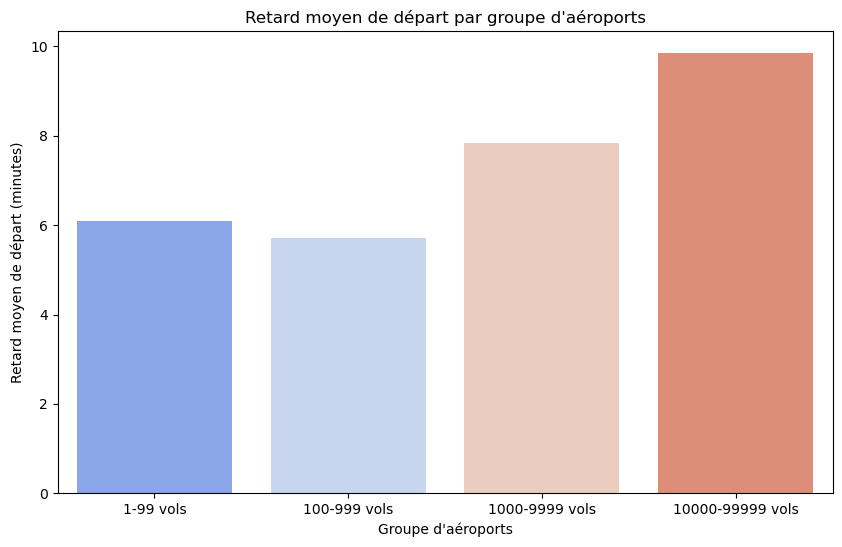

In [66]:
# Compter le nombre de vols au d√©part de chaque a√©roport
count_flights = data_clean['Origin'].value_counts()

# D√©finir les propri√©t√©s des marqueurs et des √©tiquettes
size_limits = [1, 100, 1000, 10000, 100000]  # Limites des tailles des marqueurs
labels = ["1-99 vols", "100-999 vols", "1000-9999 vols", "10000-99999 vols"]  # √âtiquettes pour les diff√©rentes cat√©gories de vols

# Filtrer les a√©roports pour n'inclure que ceux pr√©sents dans count_flights
filtered_airports = airports[airports['IATA_CODE'].isin(count_flights.index)]

# Calculer le retard moyen pour chaque groupe
grouped_airports = {}
for i in range(len(size_limits) - 1):
    group = filtered_airports[filtered_airports['IATA_CODE'].isin(
        count_flights[(count_flights >= size_limits[i]) & (count_flights < size_limits[i + 1])].index
    )]
    grouped_airports[labels[i]] = data_clean[data_clean['Origin'].isin(group['IATA_CODE'])]['DepDelay'].mean()

# Convertir le dictionnaire en DataFrame pour faciliter la visualisation
df_grouped_airports = pd.DataFrame(list(grouped_airports.items()), columns=['Groupe', 'Retard moyen'])

# Cr√©er un diagramme √† barres
plt.figure(figsize=(10, 6))
sns.barplot(x='Groupe', y='Retard moyen', data=df_grouped_airports, palette="coolwarm")
plt.title("Retard moyen de d√©part par groupe d'a√©roports")
plt.xlabel("Groupe d'a√©roports")
plt.ylabel("Retard moyen de d√©part (minutes)")
plt.show()


* Un loi naturel qui se deduit est que les a√®roport qui sont caract√©ris√©s par un nombre de vol √©l√©v√© vont syst√®matiquement avoir un nombre  moyen de retard plus important vue le grand nombre d'op√©ration.

* On remarque que la diff√©rence entre le  nombre moyen de vol pour chaque cat√©gorie est presque constant sauf pour la premi√®re.

* la premi√®re catagorie d'a√®roport qui effectue le plus bas nombre de vol est caract√©ris√© par un retard moyen un peu plus important que la deuxi√®me cat√©gorie. ce qui sugg√®re qu'il a des autres facteurs externes qui affecte la relation entre l'a√®roport et le retard de d√©part

**Relation entre l'a√®roport d'origine , la compagnie a√®rienne et la retard de depart**

Dans cette section,nous allons examiner les variations des retards en fonction de l'a√©roport d'origine et pour chaque compagnie a√©rienne.

La premi√®re √©tape consiste donc √† d√©terminer les retards moyens par a√©roport.

In [67]:
# Calculer les retards moyens pour chaque combinaison a√©roport-compagnie a√©rienne
airport_carrier_delays = data_clean.groupby(['Origin', 'UniqueCarrier'])['DepDelay'].mean().unstack()

# V√©rifier la taille de la table de donn√©es
print(airport_carrier_delays.shape)

(200, 10)


Dans l'√©tape suivante vu le nombre des aeroports est tr√®s grand (200) on partitioner la visualisation de la moyenne de retard pour chaque companie et par a√®roport sur deux heatmaps

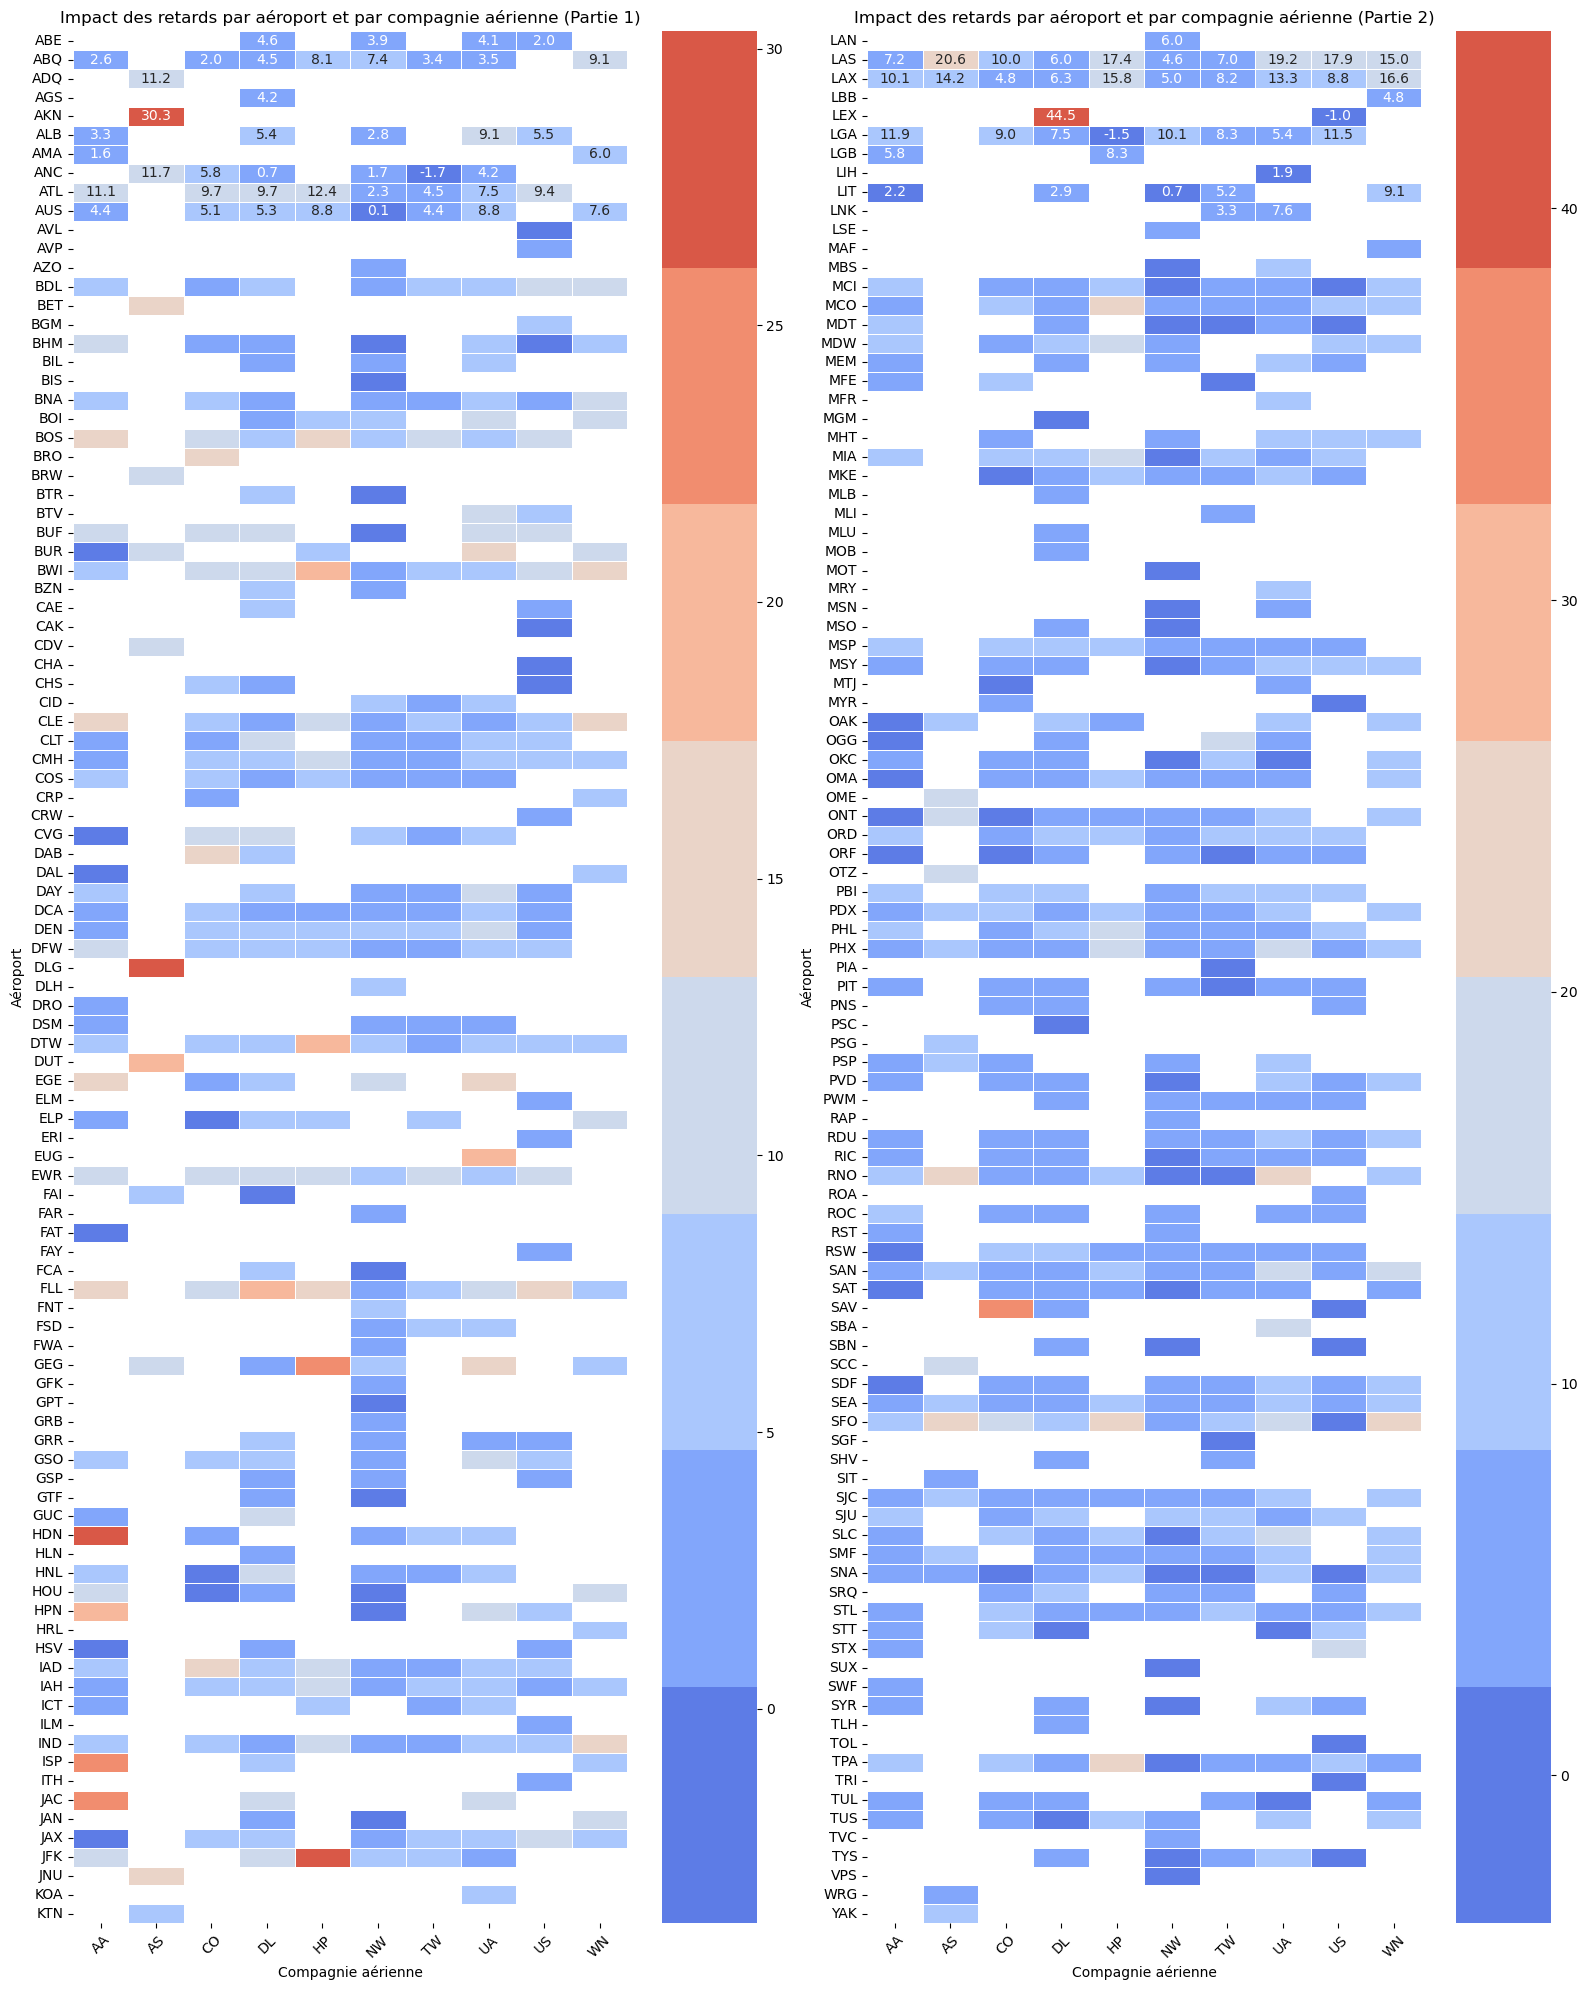

In [68]:
# Cr√©er une palette de couleurs avec 8 couleurs distinctes
palette = sns.color_palette("coolwarm", 8)

# Diviser la table en deux sous-ensembles pour les heatmaps
split_point = len(airport_carrier_delays) // 2
subset1 = airport_carrier_delays.iloc[:split_point]
subset2 = airport_carrier_delays.iloc[split_point:]

# Cr√©er une figure avec une taille ajust√©e pour deux heatmaps c√¥te √† c√¥te
plt.figure(figsize=(16, 20))

# Cr√©er le premier heatmap
ax1 = plt.subplot(1, 2, 1)
sns.heatmap(subset1, cmap=palette, annot=True, fmt=".1f", linewidths=.5, ax=ax1)
ax1.set_title("Impact des retards par a√©roport et par compagnie a√©rienne (Partie 1)")
ax1.set_xlabel("Compagnie a√©rienne")
ax1.set_ylabel("A√©roport")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Cr√©er le deuxi√®me heatmap
ax2 = plt.subplot(1, 2, 2)
sns.heatmap(subset2, cmap=palette, annot=True, fmt=".1f", linewidths=.5, ax=ax2)
ax2.set_title("Impact des retards par a√©roport et par compagnie a√©rienne (Partie 2)")
ax2.set_xlabel("Compagnie a√©rienne")
ax2.set_ylabel("A√©roport")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Ajuster la disposition pour √©viter le chevauchement
plt.tight_layout()
plt.show()


Comme discut√© dans la section pr√©c√©dente, on observe que le nombre moyen des retards de d√©part pour les compagnies AS et HP est plus √©lev√© par rapport aux autres compagnies. De plus, ce grand retard moyen pour ces deux compagnies est d√ª √† certains a√©roports d'origine. Par exemple, on remarque que les a√©roports de **DLG, AKN, JNU** et **DUT**, qui ne se connectent qu'avec la compagnie **AS**, se caract√©risent par des retards moyens √©lev√©s par rapport √† l'a√©roport FAI qui se connecte avec AS et d'autres compagnies et qui a un nombre moyen de retards de d√©part acceptable.

On observe aussi que l'a√©roport **SEA** (dans la heatmap de droite) se caract√©rise par un intervalle de retards sans valeurs √©lev√©es pour toutes les compagnies avec lesquelles il est en relation.

Nous pouvons donc d√©duire de ces observations qu'il existe une grande variabilit√© dans les retards moyens, √† la fois entre les diff√©rents a√©roports et entre les diff√©rentes compagnies a√©riennes. Cela est important car cela implique que pour mod√©liser avec pr√©cision les retards, il sera n√©cessaire d'adopter un mod√®le sp√©cifique √† la compagnie a√©rienne et √† l'a√©roport d'origine.

**Relation entre le vol (a√®roport d'origine -> a√®roport de destination) , la compagnie a√®rienne et la retard de depart**

Nous allons maintenant ajouter un niveau de granularit√©. Nous allons essayer de prouver l'existance de relations entre les vols, la compagnie a√®rienne et le retard de d√©part.
Pour ceci nous allons consid√©rer le cas d'une seule compagnies a√®rienne **AA:American Airline** qui appartient au premier groupe qui monopolise le march√© et qui est caract√©rise par des relations multiples avec les a√®roports

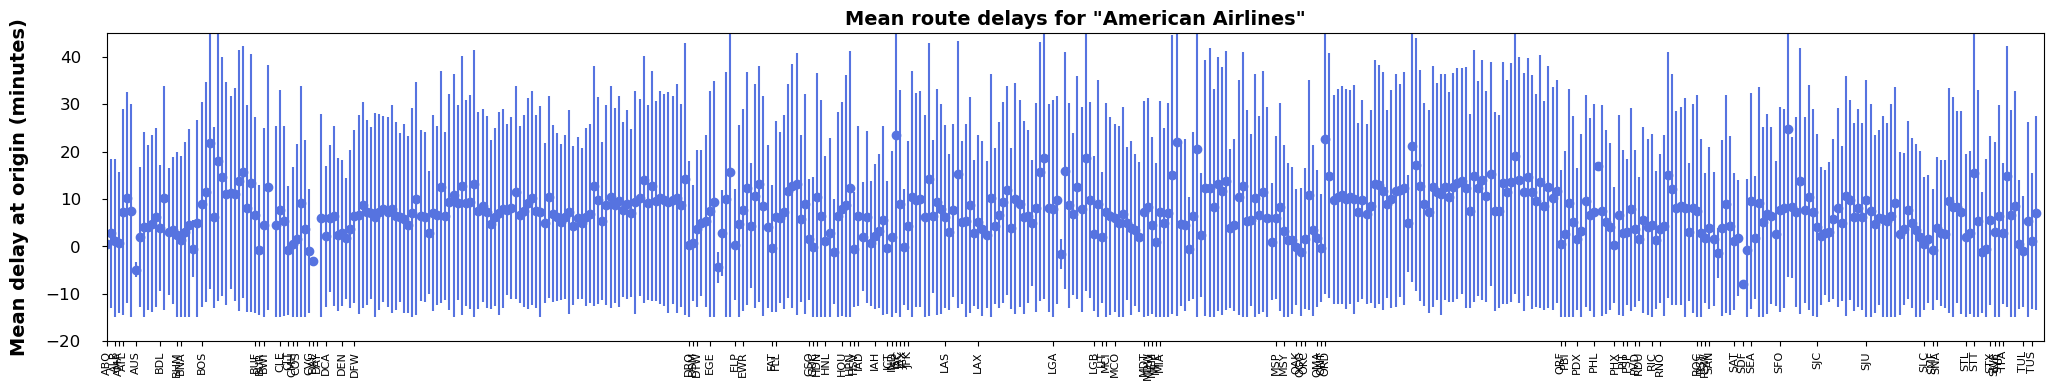

In [69]:
# S√©lectionner la compagnie American Airlines et cr√©er un sous-ensemble du dataframe principal
carrier = 'AA'
df1 = data_clean[data_clean['UniqueCarrier'] == carrier][['Origin', 'Dest', 'DepDelay']]

# Collecter les trajets et lister les retards pour chacun d'eux
trajet = dict()
for ind, col in df1.iterrows():
    if pd.isnull(col['DepDelay']): continue
    route = str(col['Origin']) + '-' + str(col['Dest'])
    if route in trajet.keys():
        trajet[route].append(col['DepDelay'])
    else:
        trajet[route] = [col['DepDelay']]

# Transposer le dictionnaire en liste pour trier les trajets par origines
liste_trajet = []
for key, value in trajet.items():
    liste_trajet.append([key, value])
liste_trajet.sort()

mean_val = []
std_val = []
x_label = []

i = 0
for route, liste_retards in liste_trajet:
    # D√©finir les labels comme les a√©roports d'origine
    index = route.split('-')[0]
    x_label.append(lignes_aeriennes.get(index, index))  # Utiliser le nom de l'a√©roport ou le code si non trouv√©
    # Mettre une limite sur les retards pour √©viter que les valeurs √©lev√©es prennent trop de poids
    trajet2 = [min(90, s) for s in liste_retards]
    # Calculer la moyenne et les √©carts-types
    mean_val.append(np.mean(trajet2))
    std_val.append(np.std(trajet2))
    i += 1

# Tracer le graphique
fig, ax = plt.subplots(figsize=(25, 4))
std_min = [max(0, min(15 + mean_val[i], abs(s))) for i, s in enumerate(std_val)]

ax.errorbar(list(range(i)), mean_val, yerr=[std_min, std_val], fmt='o')
ax.set_title('Mean route delays for "{}"'.format('American Airlines'), fontsize=14, weight='bold')
plt.ylabel('Mean delay at origin (minutes)', fontsize=14, weight='bold', labelpad=12)

# D√©finir les plages et les positions des ticks
imin, imax = 0, len(x_label)
plt.xlim(imin, imax)
plt.ylim(-20, 45)
liste_ticks = [imin]
for j in range(imin + 1, imax):
    if x_label[j] == x_label[j - 1]: continue
    liste_ticks.append(j)

# D√©finir les param√®tres des ticks
ax.set_xticks(liste_ticks)
ax.set_xticklabels([x_label[int(x)] for x in ax.get_xticks()], rotation=90, fontsize=8)
plt.setp(ax.get_yticklabels(), fontsize=12, rotation=0)
ax.tick_params(axis='y', which='major', pad=15)

plt.show()

cette figure pr√©sente les retrds moyens pour **AA** selon l'a√®roport de d√©part et la destination.Les barres d'erreur associ√©es aux diff√©rents trajets correspondent aux √©carts-types. Dans cet exemple, on peut constater que pour un a√©roport d'origine donn√©, les retards varieront en fonction de la destination. 

## <font color='  #d98880'>3.4.Effet du temps de d√©part

Considerant le cas d'une companie sp√©cifique et d'un a√®roport , on va d√©couvrir l'effet du temps de d√©part sur le delay du d√©part 

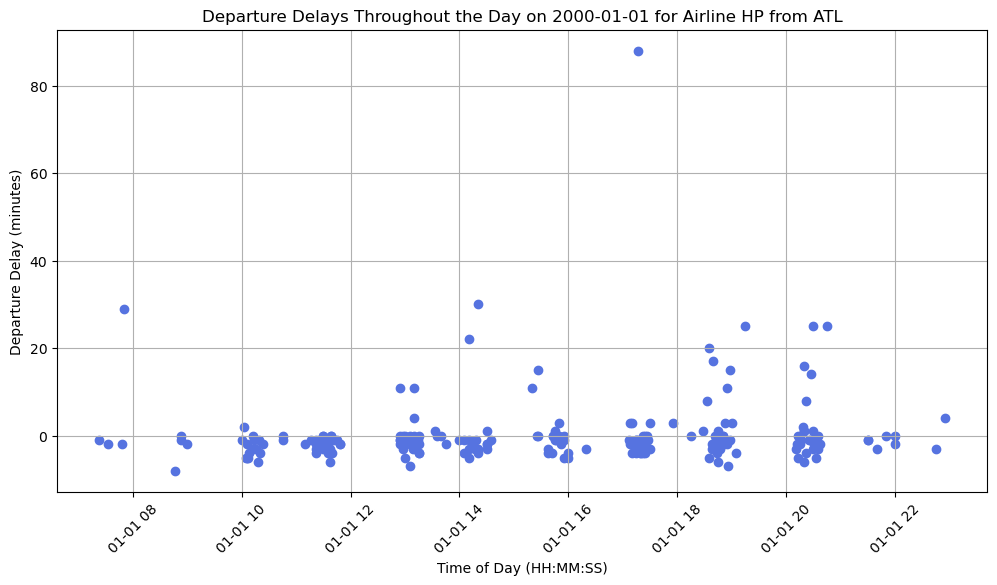

In [73]:
# Filter data for the specific day
specific_day = data_clean[data_clean['Date']== '2000-01-01']

# Filter data for specific airline 
specific_airline = specific_day[specific_day['UniqueCarrier'] == 'TW']

# Filter data for specific origin (e.g., 'ATL')
specific_origin = specific_airline[specific_airline['Origin'] == 'STL']

# Convert 'DepTime' to datetime
specific_origin['CRSDepTime'] = pd.to_datetime(specific_origin['CRSDepTime'], format='%H:%M:%S')

plt.figure(figsize=(12, 6))
plt.scatter(specific_origin['CRSDepTime'], specific_origin['DepDelay'], marker='o')
plt.xlabel('Time of Day (HH:MM:SS)')
plt.ylabel('Departure Delay (minutes)')
plt.title('Departure Delays Throughout the Day on 2000-01-01 for Airline HP from ATL')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

On voit une certaines variabilit√© du retard de depart le long de la journ√©e

## <font color='  #d98880'>3.4.Relation entre l'avion utilis√© pour le vol et le retard de d√©part

Nous allons √©tudi√© la relation entre l'avion utilis√© pour le vol  `TailNum` et le retard de d√©part

Nous allons d'abord calculer le nombre d'avion utilis√© dans tous les vols

In [96]:
# Calculer les valeurs distinctes de TailNum
valeurs_distinctes_tailnum = data_clean['TailNum'].unique()
print("Nombre d'avion totale est",len(valeurs_distinctes_tailnum))

Nombre d'avion totale est 3715


Nous allons visualiser le nombre d'avion utilis√© par chaque compagnie a√®rienne

In [97]:
# Nombre d'avion utilis√© par compagnie a√©rienne et compter les num√©ros de queue distincts
tailnum_par_compagnie = data_clean.groupby('UniqueCarrier')['TailNum'].nunique()
tailnum_par_compagnie

UniqueCarrier
AA    695
AS     90
CO    356
DL    585
HP    125
NW    386
TW    184
UA    594
US    386
WN    314
Name: TailNum, dtype: int64

**Retard moyen de d√©pard selon les num√©ro de queue utilis√© (TailNum) pour une  compagnie a√®rienne sp√©cifique .**

On va choisir pour cela, les 2 companies a√®riennes **AS** et **AA** . Ces deux companies occupent des parts diff√©rentes du march√© et leur distribution du retrd de d√©part ne se caract√©rise pas pas des outliers de valeurs grande .Nous avons fait ces choix attentionnellement afin que les r√©sultats ne soit pas bias√©es .

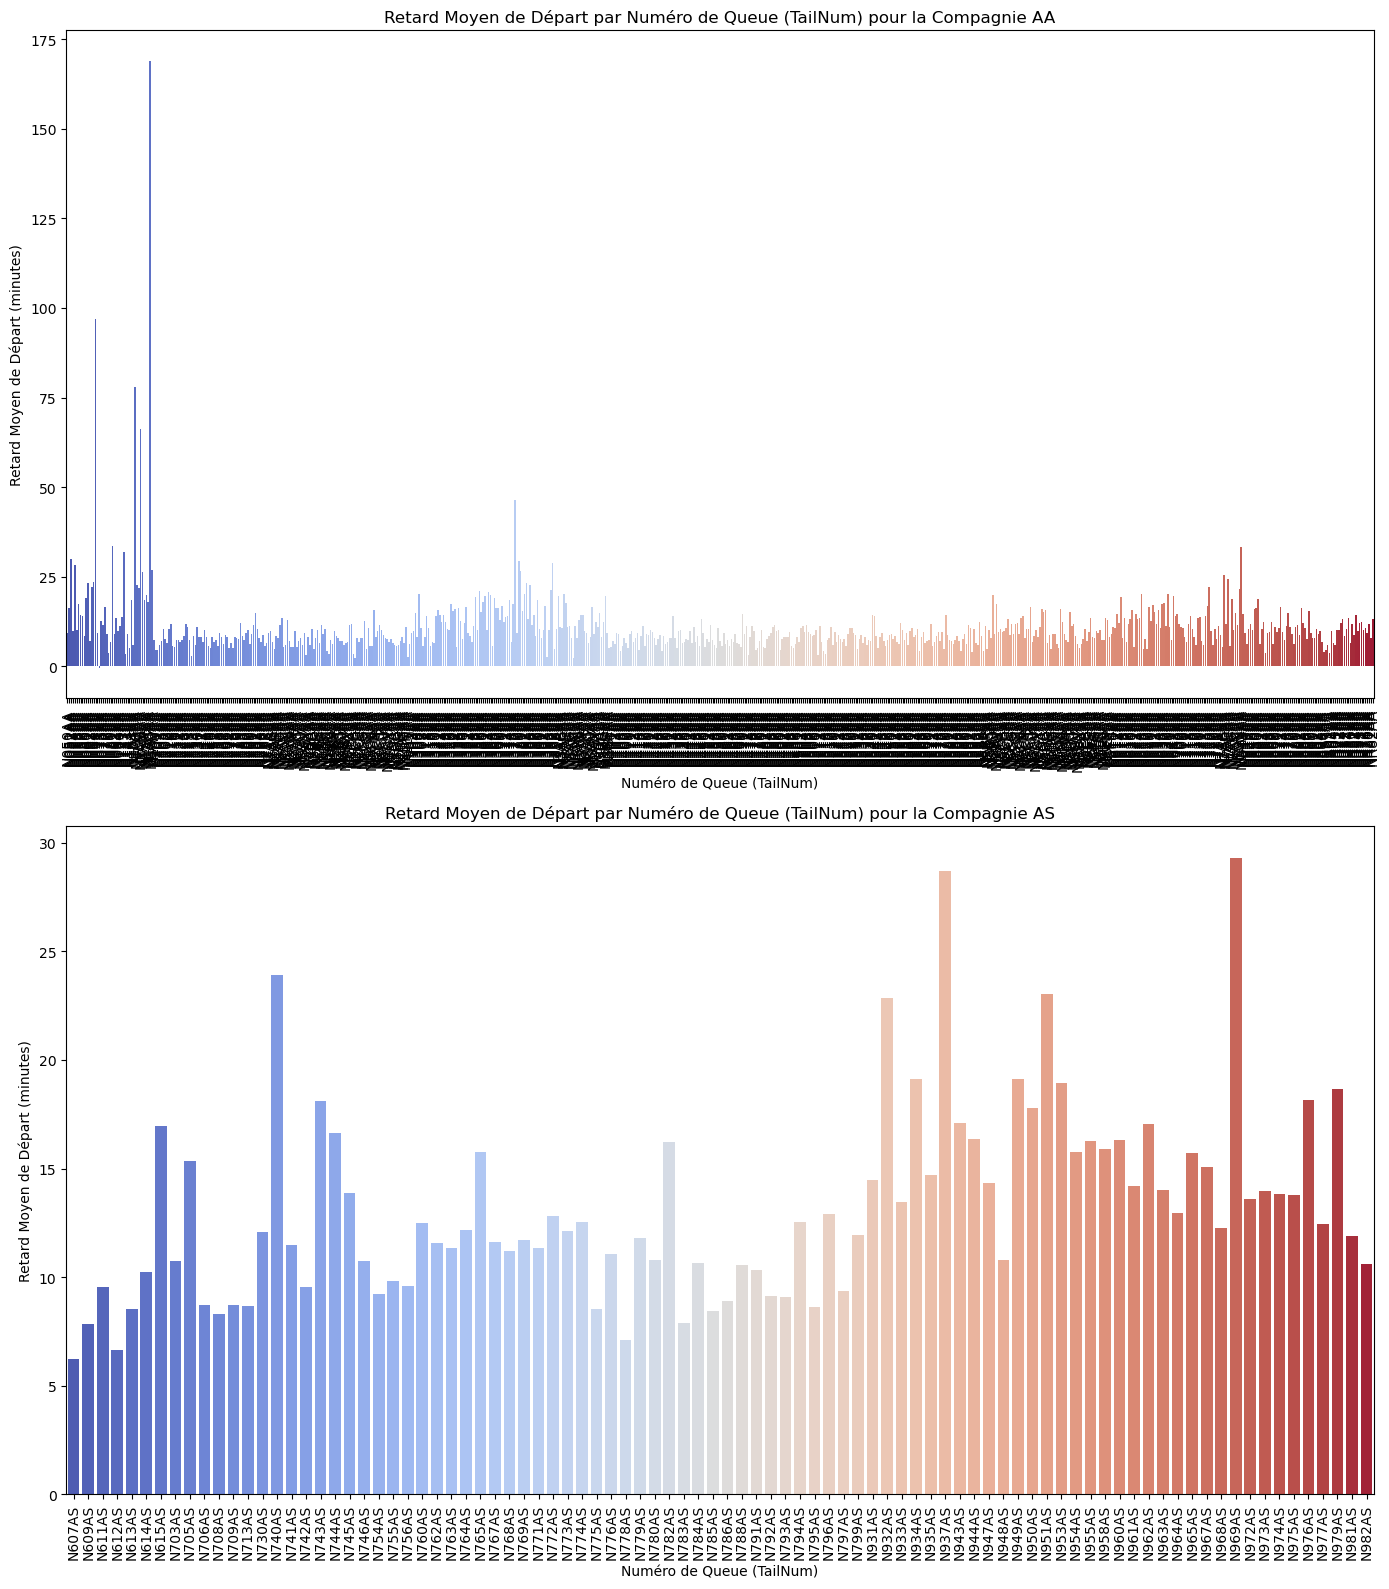

In [98]:
# Filtrer les donn√©es pour les compagnies a√©riennes sp√©cifiques (AA et AS)
data_clean_aa = data_clean[data_clean['UniqueCarrier'] == 'AA']
data_clean_as = data_clean[data_clean['UniqueCarrier'] == 'AS']

# Calculer le retard moyen de d√©part pour chaque num√©ro de queue (TailNum) pour AA
moyenne_retard_par_tailnum_aa = data_clean_aa.groupby('TailNum')['DepDelay'].mean().reset_index()
moyenne_retard_par_tailnum_aa.columns = ['TailNum', 'MeanDepDelay']

# Calculer le retard moyen de d√©part pour chaque num√©ro de queue (TailNum) pour AS
moyenne_retard_par_tailnum_as = data_clean_as.groupby('TailNum')['DepDelay'].mean().reset_index()
moyenne_retard_par_tailnum_as.columns = ['TailNum', 'MeanDepDelay']

# Cr√©ation de la figure et des sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 16))

# Plot pour la compagnie AA
sns.barplot(ax=axes[0], x='TailNum', y='MeanDepDelay', data=moyenne_retard_par_tailnum_aa, palette='coolwarm')
axes[0].set_title('Retard Moyen de D√©part par Num√©ro de Queue (TailNum) pour la Compagnie AA')
axes[0].set_xlabel('Num√©ro de Queue (TailNum)')
axes[0].set_ylabel('Retard Moyen de D√©part (minutes)')
axes[0].tick_params(axis='x', rotation=90)  # Rotation des √©tiquettes pour une meilleure lisibilit√©

# Plot pour la compagnie AS
sns.barplot(ax=axes[1], x='TailNum', y='MeanDepDelay', data=moyenne_retard_par_tailnum_as, palette='coolwarm')
axes[1].set_title('Retard Moyen de D√©part par Num√©ro de Queue (TailNum) pour la Compagnie AS')
axes[1].set_xlabel('Num√©ro de Queue (TailNum)')
axes[1].set_ylabel('Retard Moyen de D√©part (minutes)')
axes[1].tick_params(axis='x', rotation=90)  # Rotation des √©tiquettes pour une meilleure lisibilit√©

# Ajuster la disposition pour √©viter les chevauchements
plt.tight_layout()

# Afficher le plot
plt.show()


Les 2 plots une grande variabilit√© entre les retards de d√©part de chaque num√©ro de queue pour les deux plots. Donc le variable **TailNum** joue un role significatif dans les retards de d√©part.

**Retard de d√©pard moyen pour chaque vol(origine _destination) et pour chaque num√©ro de queue pour une companie a√®rienne sp√©cifique**

L'id√©e est de d√©couvrir s'il existe une grande corr√©lation entre l'allocation du queue et le vol. 

Dans ce qui suit la fonction pour calaculer la corr√©lation entre le vol et le num√©ro de queue pour chaque compagnie a√®rienne 

In [110]:
def calculate_correlation(data, airline):
    # Filtrer les donn√©es pour la compagnie a√©rienne sp√©cifique
    data_airline = data[data['UniqueCarrier'] == airline]

    # Cr√©er une variable combin√©e "Vol" √† partir des colonnes "Origin" et "Dest"
    data_airline['Vol'] = data_airline['Origin'] + '-' + data_airline['Dest']

    # Initialiser les encodeurs de labels
    le_vol = LabelEncoder()
    le_tailnum = LabelEncoder()

    # Convertir les variables cat√©gorielles "Vol" et "TailNum" en repr√©sentations num√©riques
    data_airline['Vol_encoded'] = le_vol.fit_transform(data_airline['Vol'])
    data_airline['TailNum_encoded'] = le_tailnum.fit_transform(data_airline['TailNum'])

    # Calculer la corr√©lation entre "Vol_encoded" et "TailNum_encoded"
    correlation = data_airline['Vol_encoded'].corr(data_airline['TailNum_encoded'])

    return correlation



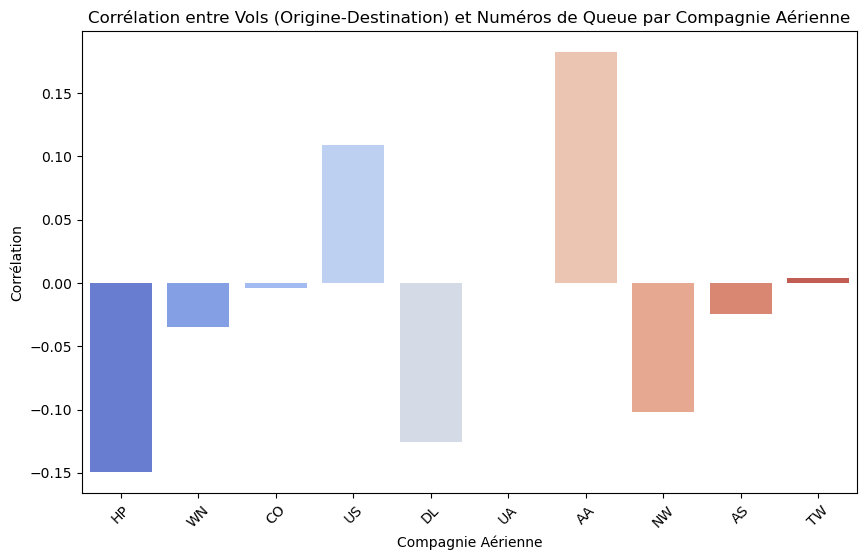

In [112]:
# Calculer les corr√©lations pour chaque compagnie a√©rienne
correlation_results = {}
compagnies_aeriennes = data_clean['UniqueCarrier'].unique()
for airline in compagnies_aeriennes:
    correlation_results[airline] = calculate_correlation(data_clean, airline)

# Cr√©er un DataFrame √† partir des r√©sultats
df_correlation = pd.DataFrame(list(correlation_results.items()), columns=['Compagnie A√©rienne', 'Corr√©lation'])

# Tracer les valeurs de corr√©lation
plt.figure(figsize=(10, 6))
sns.barplot(x='Compagnie A√©rienne', y='Corr√©lation', data=df_correlation, palette='coolwarm')
plt.title('Corr√©lation entre Vols (Origine-Destination) et Num√©ros de Queue par Compagnie A√©rienne')
plt.xlabel('Compagnie A√©rienne')
plt.ylabel('Corr√©lation')
plt.xticks(rotation=45)
plt.show()

On conclut qu'i n'y a pas une relation vraiment significatif entre les vols et le Num√©ros de queue. 

Le code suivnat visualise une allocation des avions pour les vols pour la compagnie American Airline.

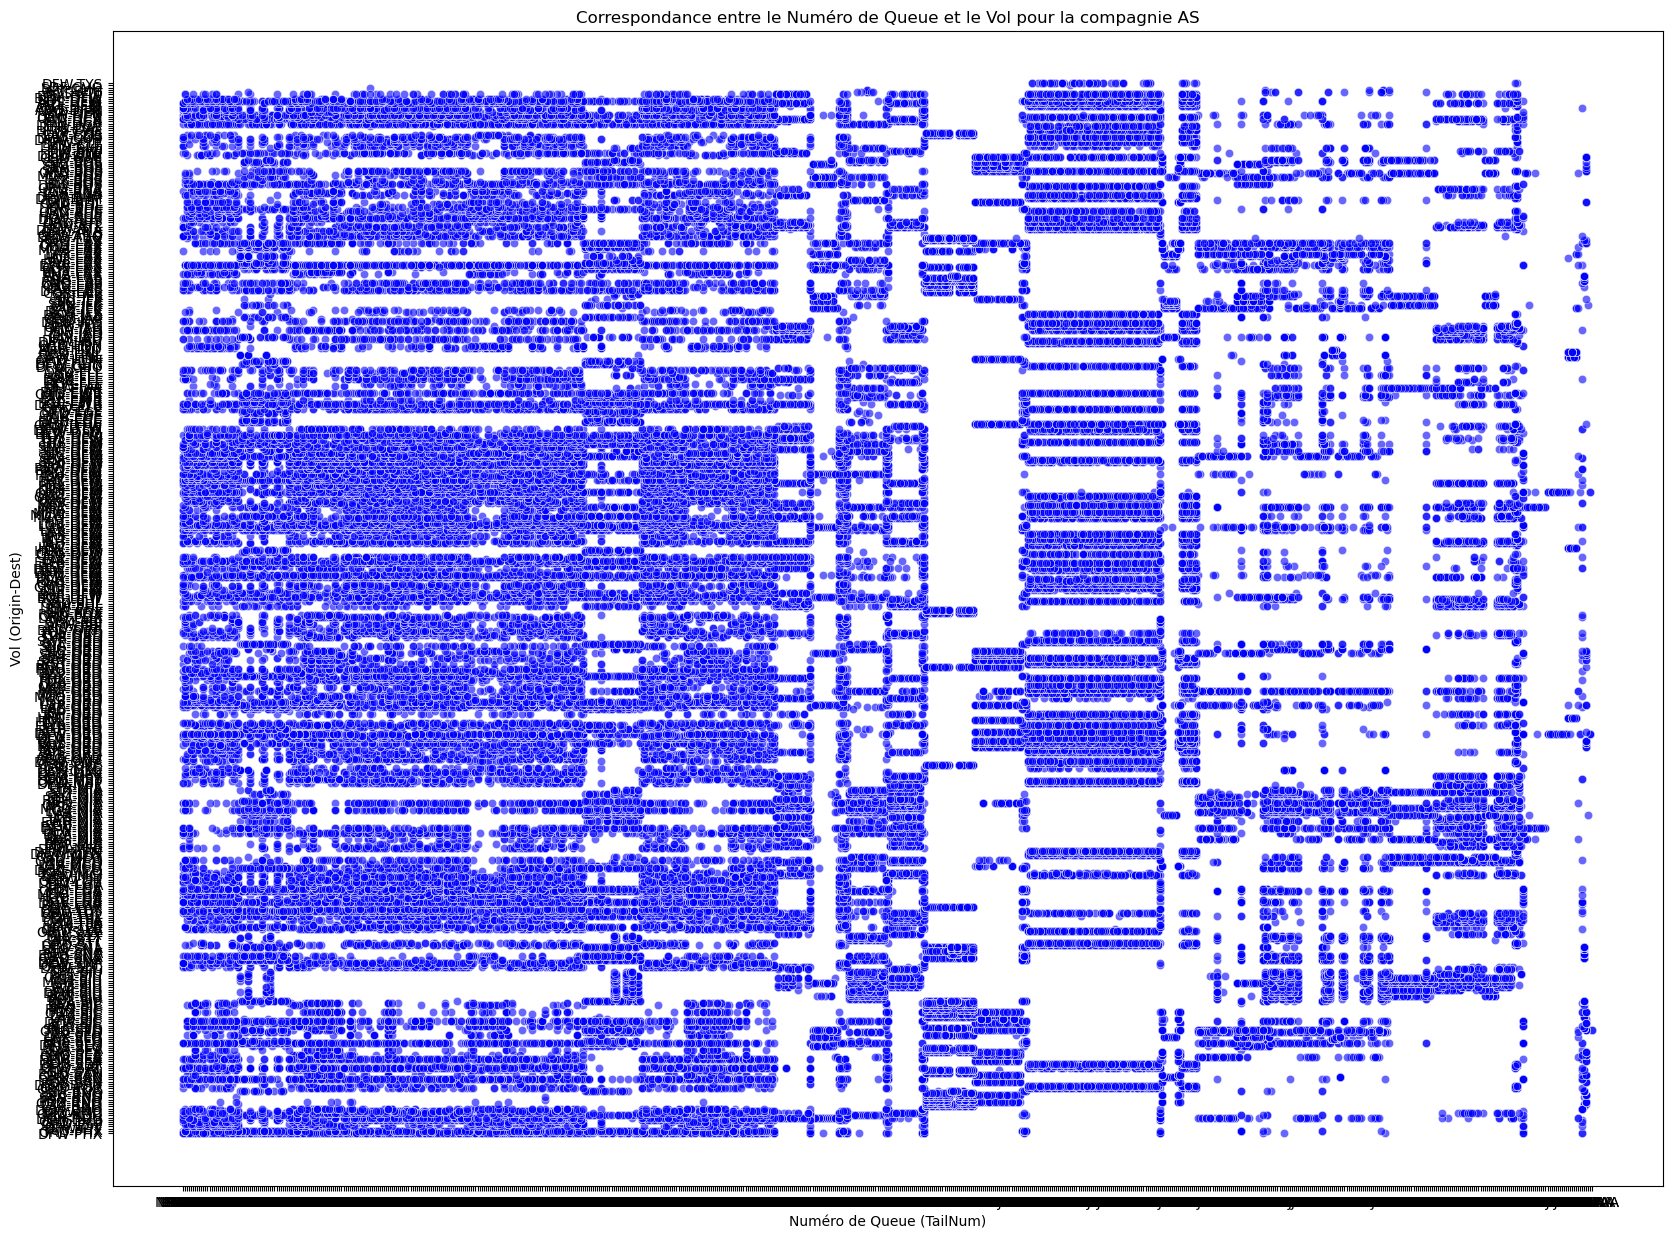

In [62]:
# Filtrer les donn√©es pour la compagnie a√©rienne sp√©cifique (AS)
data_clean_as = data_clean[data_clean['UniqueCarrier'] == 'AA']

# Cr√©er une repr√©sentation unique des paires de vols
data_clean_as['Vol'] = data_clean_as['Origin'] + '-' + data_clean_as['Dest']

# Obtenir les paires de vols uniques
unique_vols = data_clean_as['Vol'].unique()

# Cr√©er un dictionnaire pour mapper chaque paire de vols unique √† un entier
vol_mapping = {vol: i for i, vol in enumerate(unique_vols)}

# Ajouter une colonne mapp√©e pour les vols
data_clean_as['Vol_mapped'] = data_clean_as['Vol'].map(vol_mapping)

# Visualiser les r√©sultats avec un scatter plot
plt.figure(figsize=(20, 15))
plt.scatter(data_clean_as['TailNum'], data_clean_as['Vol_mapped'], alpha=0.6, c='blue', edgecolors='w', linewidth=0.5)
plt.xlabel('Num√©ro de Queue (TailNum)')
plt.ylabel('Vol (Origin-Dest)')
plt.title('Correspondance entre le Num√©ro de Queue et le Vol pour la compagnie AS')
plt.yticks(ticks=range(len(unique_vols)), labels=unique_vols, rotation=0)
plt.show()


 On conclut que l'allocation des avions ne d√©pend pas majoritairement de l'a√®roport d'origine et de d√©part mais par d'autre facteurs.Donc le variable TailNum est informatif pour la pr√©diction des retards de d√©part

## <font color='  #d98880'>3.5.Temps de roulage avantle d√©collage at retard de d√©part

In [79]:
# Calculer la corr√©lation entre TaxiIn et le retard de d√©part
correlation_taxiin_delay = data_clean['TaxiOut'].corr(data_clean['DepDelay'])

# Afficher la corr√©lation
print("Corr√©lation entre TaxiIn et retard de d√©part :", correlation_taxiin_delay)

Corr√©lation entre TaxiIn et retard de d√©part : 0.06024644020009758


On remarque que la corr√©lation entre TaxiIn et le retard de d√©part est tr√®s faible. Donc TaxiIn n'est pas parmi les variables pertinants pour estimer le retard de d√©part